# <a> Análise Exploratória de Dados </a>

A análise exploratória de dados é a primeira fase de qualquer projeto de Ciência de Dados. Construída sempre numa etapa inicial, a AED é fruto da reflexão acerca das principais necessidades do objeto de estudo a ser analisado. Nesse sentido, a análise exploratória de dados está intimamente relacionada à fase de Business Understanding da metodologia CRISP-DM (Cross Industry Standard Process for Data Mining). Dessa forma, a AED é extremamente relevante para o auxílio de tomada de decisão, conforme é possível mostrar a distribuição dos dados, sua evolução, e também a correlação entre variáveis diversas.

## <a> Visão Geral - ENEM 2022 </a>

O presente projeto apresenta a base de microdados do ENEM 2022, isto é, os dados em sua forma mais desagregada, contendo as características, questões marcadas e respostas de questionários (de caráter social) para cada indivíduo. A base de dados utilizada possui grande dimensão, ora de features, ora de observações, o que possibilita uma análise mais rica, e, consequentemente, maior geração de insights. Em vista disso, é essencial perceber que o Exame Nacional do Ensino Médio representa uma oportunidade de entrada nas universidades, sendo os dados aqui analisados de grande valia, seja para a formulação de melhores políticas públicas, ou para o acompanhamento do perfil do estudante por empresas na área de educação.

A fonte dos dados utilizada pode ser encontrada em: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

# <a>Objetivos</a>

O principal objetivo deste projeto é explorar e gerar insights acerca das relações expressas nos microdados do ENEM 2022, o que é de extrema importância para o setor de educação no geral. Sendo assim, um dos focos deste projeto consiste em identificar quais características são mais influentes sobre a nota do participante. Além disso, reconhecer o perfil do estudante também é outro objetivo deste projeto. Nesse sentido, a análise realizada será retrospectiva, não pretendendo abrangir nenhum tipo de modelagem preditiva. Além disso, a exploração de dados também não se propõe a identificar relações de causalidade, tendo em vista que este projeto almeja construir o que se denomina análise de correlação.


Este projeto foi executado durante a formação da "Let's Data" - Jornada Cientista de Dados - https://www.letsdata.ai/

## <a>Bibliotecas</a>

In [1]:
# importando bibliotecas
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as st
import plotly.express as px
from string import ascii_uppercase

# Configurando pandas para mostrar todas as linhas e colunas
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Setando configuração do pandas para não mostrar notação científica para números
pd.set_option("display.float_format", lambda x: '%2.f'% x)

## <a>Conversão em parquet</a>

In [2]:
# Instalar o pyarrow para converter o arquivo csv em parquet 
#!pip install pyarrow

In [3]:
# Convertendo arquivo csv em parquet para usar menos espaço
#df_enem_csv = pd.read_csv('./dados/dados_enem_2022.csv', encoding='ISO-8859-1', sep = ';')
#df_enem_csv.to_parquet('./dados/dados_enem_2022.parquet')

## <a>Dados</a>

In [4]:
# Lendo os arquivos (que agora estão em .parquet)
df_enem = pd.read_parquet("./dados/dados_enem_2022.parquet")

# Vendo as dimensões da base de dados
df_enem.shape

(3476105, 76)

In [5]:
# Visualizando os dados pela primeira vez
df_enem.head()

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0  210057943671    2022               14       M                2   
1  210057516120    2022               14       M                2   
2  210057280536    2022                5       F                1   
3  210055724397    2022                6       M                1   
4  210055097896    2022                4       M                0   

   TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
0            2                 1                1                2          1   
1            1                 1                1               16          1   
2            2                 1                1                2          1   
3            3                 1                1                2          1   
4            3                 1                1                1          1   

   TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  CO_UF_ESC  \
0        NaN             0               NaN             None        NaN   
1        NaN             0               NaN             None        NaN   
2        NaN             0               NaN             None        NaN   
3        NaN             0               NaN             None        NaN   
4        NaN             0               NaN             None        NaN   

  SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
0      None                     NaN                 NaN              NaN   
1      None                     NaN                 NaN              NaN   
2      None                     NaN                 NaN              NaN   
3      None                     NaN                 NaN              NaN   
4      None                     NaN                 NaN              NaN   

   CO_MUNICIPIO_PROVA         NO_MUNICIPIO_PROVA  CO_UF_PROVA SG_UF_PROVA  \
0             5300108                   Brasília           53          DF   
1             5300108                   Brasília           53          DF   
2             2925758  Presidente Tancredo Neves           29          BA   
3             3201308                  Cariacica           32          ES   
4             1506203                Salinópolis           15          PA   

   TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  \
0               0               0               0               0   
1               0               0               0               0   
2               1               1               1               1   
3               1               1               1               1   
4               0               0               0               0   

   CO_PROVA_CN  CO_PROVA_CH  CO_PROVA_LC  CO_PROVA_MT  NU_NOTA_CN  NU_NOTA_CH  \
0          NaN          NaN          NaN          NaN         NaN         NaN   
1          NaN          NaN          NaN          NaN         NaN         NaN   
2         1087         1056         1066         1078         421         546   
3         1088         1058         1067         1077         491         389   
4          NaN          NaN          NaN          NaN         NaN         NaN   

   NU_NOTA_LC  NU_NOTA_MT                                TX_RESPOSTAS_CN  \
0         NaN         NaN                                           None   
1         NaN         NaN                                           None   
2         499         565  DCDCEBADDABEDBCBEAEACCDDECEEBECBECAAECDDDDBCE   
3         358         416  BACBBABBCAABCABBCBACBCBCBACABACABCBDBCBABAACA   
4         NaN         NaN                                           None   

                                 TX_RESPOSTAS_CH  \
0                                           None   
1                                           None   
2  DBDABCADADECACBDCCEDACCCECDDABDCEADABCBCBAEAB   
3  BBCAACACDCABCBACCABABCBACBCABBBBBABCBACCBCBBA   
4                                           None   

                                 TX_RESPOSTAS_LC  \


In [6]:
# Checando se não há números repetidos na coluna "NU_INSCRICAO"
len(df_enem['NU_INSCRICAO'].unique())

3476105

In [7]:
# Esse é o mesmo número de linhas da base de dados
df_enem.shape[0]

3476105

In [8]:
# Portanto, cada número de inscrição é único
len(df_enem['NU_INSCRICAO'].unique()) == df_enem.shape[0]

True

Sendo assim, podemos dizer que participaram do ENEM 2022 mais de 3,47 milhões de pessoas.

In [9]:
# Visualizando os tipos dos dados
df_enem.dtypes

NU_INSCRICAO                int64
NU_ANO                      int64
TP_FAIXA_ETARIA             int64
TP_SEXO                    object
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
CO_MUNICIPIO_ESC          float64
NO_MUNICIPIO_ESC           object
CO_UF_ESC                 float64
SG_UF_ESC                  object
TP_DEPENDENCIA_ADM_ESC    float64
TP_LOCALIZACAO_ESC        float64
TP_SIT_FUNC_ESC           float64
CO_MUNICIPIO_PROVA          int64
NO_MUNICIPIO_PROVA         object
CO_UF_PROVA                 int64
SG_UF_PROVA                object
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
TP_PRESENCA_MT              int64
CO_PROVA_CN               float64
CO_PROVA_CH               float64
CO_PROVA_LC   

## <a> Removendo colunas </a>

Em razão de nosso objeto de estudo, não iremos analisar as respostas dos participantes na prova. Sendo assim, removeremos tais colunas. Além disso, também removeremos as colunas de códigos (cujas informações já estavam em outras colunas na base de dados), em face de sua dificuldade interpretativa.

In [10]:
# Selecionando colunas contendo respostas da prova (começam sempre com 'TX_')
colunas_com_respostas = [coluna for coluna in df_enem.columns if coluna.startswith('TX_')]
colunas_com_respostas

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [11]:
# Selecionando colunas de códigos (começam sempre com 'CO_')
colunas_codigos = [coluna for coluna in df_enem.columns if coluna.startswith("CO_")]
colunas_codigos

['CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [12]:
# Selecionando outras colunas que não contêm informações relevantes (Número de Inscrição e Ano)
outras_colunas = ['NU_INSCRICAO', 'NU_ANO']

In [13]:
# Visualizando as colunas a serem excluídas
colunas_a_remover = colunas_com_respostas + colunas_codigos + outras_colunas 
colunas_a_remover

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_INSCRICAO',
 'NU_ANO']

*Serão excluídas 18 colunas*

In [14]:
# Excluindo as colunas
df_enem = df_enem.drop(colunas_a_remover, axis = 1)

# Visualizando as 5 primeiras linhas da nossa nova base de dados
df_enem.head()

TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
0               14       M                2            2                 1   
1               14       M                2            1                 1   
2                5       F                1            2                 1   
3                6       M                1            3                 1   
4                4       M                0            3                 1   

   TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  \
0                1                2          1        NaN             0   
1                1               16          1        NaN             0   
2                1                2          1        NaN             0   
3                1                2          1        NaN             0   
4                1                1          1        NaN             0   

  NO_MUNICIPIO_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
0             None      None                     NaN                 NaN   
1             None      None                     NaN                 NaN   
2             None      None                     NaN                 NaN   
3             None      None                     NaN                 NaN   
4             None      None                     NaN                 NaN   

   TP_SIT_FUNC_ESC         NO_MUNICIPIO_PROVA SG_UF_PROVA  TP_PRESENCA_CN  \
0              NaN                   Brasília          DF               0   
1              NaN                   Brasília          DF               0   
2              NaN  Presidente Tancredo Neves          BA               1   
3              NaN                  Cariacica          ES               1   
4              NaN                Salinópolis          PA               0   

   TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  NU_NOTA_CN  NU_NOTA_CH  \
0               0               0               0         NaN         NaN   
1               0               0               0         NaN         NaN   
2               1               1               1         421         546   
3               1               1               1         491         389   
4               0               0               0         NaN         NaN   

   NU_NOTA_LC  NU_NOTA_MT  TP_LINGUA  TP_STATUS_REDACAO  NU_NOTA_COMP1  \
0         NaN         NaN          0                NaN            NaN   
1         NaN         NaN          0                NaN            NaN   
2         499         565          1                  1            140   
3         358         416          1                  1            120   
4         NaN         NaN          0                NaN            NaN   

   NU_NOTA_COMP2  NU_NOTA_COMP3  NU_NOTA_COMP4  NU_NOTA_COMP5  \
0            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN   
2            200            120            140            160   
3             40             40            100             20   
4            NaN            NaN            NaN            NaN   

   NU_NOTA_REDACAO Q001 Q002 Q003 Q004  Q005 Q006 Q007 Q008 Q009 Q010 Q011  \
0              NaN    A    A    A    B     3    B    B    B    B    B    B   
1              NaN    D    D    E    E     3    Q    D    E    E    E    E   
2              760    E    F    A    D     2    B    A    B    C    A    A   
3              320    C    A    A    B     3    A    A    C    D    A    A   
4              NaN    D    B    A    B     2    B    A    B    B    A    A   

  Q012 Q013 Q014 Q015 Q016 Q017 Q018 Q019 Q020 Q021 Q022 Q023 Q024 Q025  
0    B    A    B    B    B    A    A    A    A    A    A    A    A    A  
1    E    E    E    E    E    E    B    E    B    B    E    B    E    B  
2    B    B    A    A    A    A    A    A    A    A    C    A    A    B  
3    B    A    B    A    B    A    A    C    A    A    C    B    B    B  
4    B    A    A    A    

In [15]:
# Visualizando como ficaram as dimensões da nova base de dados
df_enem.shape

(3476105, 58)

## <a> Dicionário de Dados </a>
Algumas colunas estão expressas em códigos, fazendo necessário descrevê-las. Outras não possuem nome mnemônico, desfavorecendo a interpretação de suas informações. Nesse sentido, utilizaremos o dicionário contido no arquivo dos microdados do ENEM 2022 para explicar algumas variáveis desta base de dados.



Faixa Etária (TP_FAIXA_ETARIA)

| Código  | Descrição                               |
|---------|-----------------------------------------|
|    1    | Menor de 17 anos                        |
|    2    | 17 anos                                 | 
|    3    | 18 anos                                 |
|    4    | 19 anos                                 |
|    5    | 20 anos                                 |
|    6    | 21 anos                                 |
|    7    | 22 anos                                 |
|    8    | 23 anos                                 |
|    9    | 24 anos                                 |
|    10   | 25 anos                                 |
|    11   | Entre 26 e 30 anos                      |
|    12   | Entre 31 e 35 anos                      |
|    13   | Entre 36 e 40 anos                      |
|    14   | Entre 41 e 45 anos                      |
|    15   | Entre 46 e 50 anos                      |
|    16   | Entre 51 e 55 anos                      |
|    17   | Entre 56 e 60 anos                      |
|    18   | Entre 61 e 65 anos                      |
|    19   | Entre 66 e 70 anos                      |
|    20   | Maios de 70 anos                        |

Sexo (TP_SEXO)

| Código | Descrição                               |
|--------|-----------------------------------------|
|    M   | Masculino                               |
|    F   | Feminino                                |

Estado Civil (TP_ESTADO_CIVIL)

| Código | Descrição                               |
|--------|-----------------------------------------|
|    0   | Não informado                           |
|    1   | Solteiro(a)                             |
|    2   | Casado(a)/Mora   com companheiro(a)     |
|    3   | Divorciado(a)/Desquitado(a)/Separado(a) |
|    4   | Viúvo(a)                                |

Cor/Raça (TP_COR_RACA)

| Código | Descrição                |
|--------|--------------------------|
| 0      | Não declarado            |
| 1      | Branca                   |
| 2      | Preta                    |
| 3      | Parda                    |
| 4      | Amarela                  |
| 5      | Indígena                 |
| 6      | Não dispõe da informação |   

Tipo Nacionalidade (TP_NACIONALIDADE)

| Código | Descrição                                       |
|--------|-------------------------------------------------|
| 0      | Não informado                                   |
| 1      | Brasileiro(a)                                   |
| 2      | Brasileiro(a)   Naturalizado(a)                 |
| 3      | Estrangeiro(a)                                  |
| 4      | Brasileiro(a)   Nato(a), nascido(a) no exterior |

Situação de Conclusão do Ensino Médio (TP_ST_CONCLUSAO)

| Código | Descrição                                              |
|--------|--------------------------------------------------------|
| 1      | Já concluí o   Ensino Médio                            |
| 2      | Estou   cursando e concluirei o Ensino Médio em 2022   |
| 3      | Estou   cursando e concluirei o Ensino Médio após 2022 |
| 4      | Não   concluí e não estou cursando o Ensino Médio      |

Notas

| Coluna     | Descrição                             |
|------------|---------------------------------------|
| NU_NOTA_CN | Nota da prova de Ciências da Natureza |
| NU_NOTA_CH | Nota da prova de Ciências Humanas     |
| NU_NOTA_LC | Nota da prova de Linguagens e Códigos |
| NU_NOTA_MT | Nota da prova de Matemática           |

E por fim, o tipo de escola do Ensino Médio (TP_ESCOLA)

| Código | Descrição                               |
|--------|-----------------------------------------|
|    1   | Não Respondeu                           |
|    2   | Pública                                 |
|    3   | Privada                                 |

## <a> Estatística Descritiva </a>

Essa parte do projeto é o cerne de toda a análise exploratória de dados. A utilização de estatística descritiva nos permite conhecer as relações entre as variáveis, visualizar sua distribuição, além de possibilitar a identificação das separatrizes, o que viabiliza a detecção de outliers em nossas features. Além disso, o uso de estatística descritiva auxilia a visualização das medidas de tendência central e dispersão dos dados, informações preciosas que contribuem para conclusões mais precisas. Em razão do conhecimento que proporciona, esse processo é extremamente importante para construção de uma análise retrospectiva, foco deste projeto. 

Apesar disso, sua utilização pode ser ainda mais abrangente, conforme permite (fugindo ao escopo deste trabalho) ter uma melhor noção acerca das melhores formas de realizar uma análise preditiva, valendo-se dos mais eficientes métodos (modelos) de Machine Learning ou até mesmo da abordagem estatística tradicional. É em virtude disso que a análise exploratória de dados é uma das primeiras etapas de todo trabalho de Data Science. 

In [16]:
df_enem.describe()

TP_FAIXA_ETARIA  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
count          3476105          3476105      3476105           3476105   
mean                 5                1            2                 1   
std                  4                0            1                 0   
min                  1                0            0                 0   
25%                  2                1            1                 1   
50%                  3                1            2                 1   
75%                  6                1            3                 1   
max                 20                4            5                 4   

       TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  \
count          3476105          3476105    3476105    1262744       3476105   
mean                 2                2          1          1             0   
std                  1                4          1          0             0   
min                  1                0          1          1             0   
25%                  1                0          1          1             0   
50%                  2                0          1          1             0   
75%                  2                2          2          1             0   
max                  4               16          3          2             1   

       TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
count                  951944              951944           951944   
mean                        2                   1                1   
std                         1                   0                0   
min                         1                   1                1   
25%                         2                   1                1   
50%                         2                   1                1   
75%                         2                   1                1   
max                         4                   2                4   

       TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  \
count         3476105         3476105         3476105         3476105   
mean                1               1               1               1   
std                 0               0               0               0   
min                 0               0               0               0   
25%                 0               0               0               0   
50%                 1               1               1               1   
75%                 1               1               1               1   
max                 2               2               2               2   

       NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  TP_LINGUA  \
count     2355395     2493442     2493442     2355395    3476105   
mean          496         527         517         543          0   
std            72          81          78         116          0   
min             0           0           0           0          0   
25%           440         477         468         449          0   
50%           486         530         526         531          0   
75%           543         582         573         622          1   
max           875         839         801         986          1   

       TP_STATUS_REDACAO  NU_NOTA_COMP1  NU_NOTA_COMP2  NU_NOTA_COMP3  \
count            2493442        2493442        2493442        2493442   
mean                   1            119            141            115   
std                    1             37             54             41   
min                    1              0              0              0   
25%                    1            100            120            100   
50%                    1            120            140            120   
75%                    1            140            200            140   
max                    9            200            200            200   

       NU_NOTA_COMP4  NU_NOTA_COMP5  NU_NOTA_REDACAO    Q005  
count

## <a> Analisando as notas </a>

In [17]:
# Separando em notas das provas objetivas 
colunas_notas_obj = [coluna for coluna in df_enem if (('NOTA') in coluna) & (('COMP') not in coluna)
                     & (('REDACAO') not in coluna)]
print(f"Notas da prova objetiva: {colunas_notas_obj}\n")

# E notas da redação
colunas_notas_red = [coluna for coluna in df_enem if ((('REDACAO') in coluna) or (('COMP') in coluna))
                     & (('TP') not in coluna)]
print(f"\nNotas da prova de redação: {colunas_notas_red}")

Notas da prova objetiva: ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']


Notas da prova de redação: ['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']


## <a> Notas das provas objetivas </a>

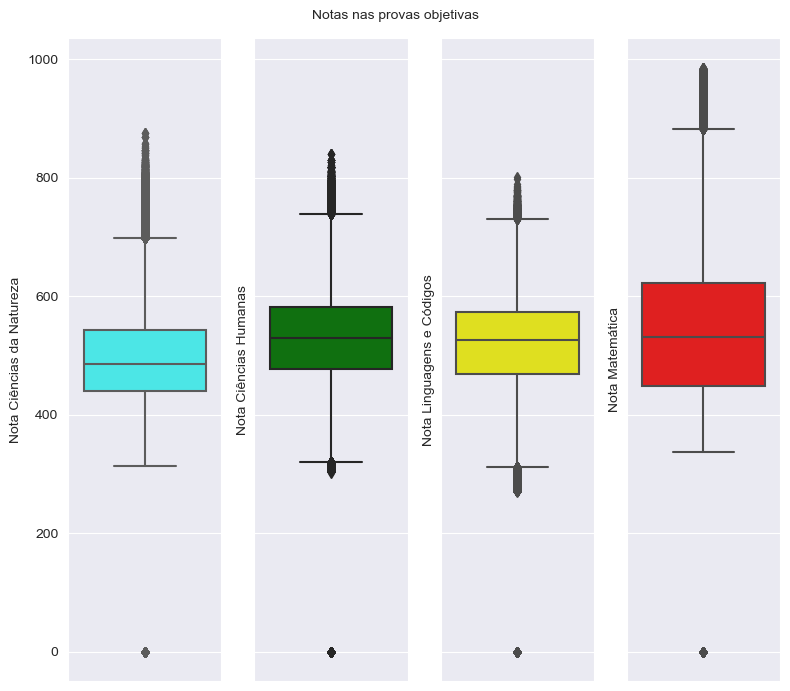

In [18]:
# Setando estilo e criando subplots
sns.set_style("darkgrid")
figura, axes = plt.subplots(1,4, sharey = True, figsize = (8,7))

# Definindo as cores a serem usadas
cores = ["#33FFFF", "#008000", "#FFFF00", "#FF0000"]

# Definindo nomes a serem usados
nomes = {0:"Nota Ciências da Natureza",1:"Nota Ciências Humanas",2:"Nota Linguagens e Códigos",3:"Nota Matemática"}

# Plotando boxplot
for i in range(len(colunas_notas_obj)):
    sns.boxplot(data=df_enem, y = colunas_notas_obj[i], ax = axes[i], color = cores[i])

# Definindo rótulos dos eixos y de cada gráfico
for i in range(len(nomes)):
    axes[i].set_ylabel(f"{(nomes[i])}")

plt.suptitle("Notas nas provas objetivas", fontsize=10)
plt.tight_layout()
plt.show()

A partir dos gráficos acima, é possível perceber alguns fatos interessantes:
1) A mediana das notas de Ciências da Natureza é a menor entre as 4.
2) Enquanto Ciências da Natureza, Ciências Humanas e Linguagens e Códigos tem uma dispersão similar, é nas notas de Matemática em que se encontra o maior intervalo interquartílico, o que representa uma maior dispersão.
3) As notas máximas de Matemática excedem as de qualquer outra prova. Esse fato, aliado ao ponto 2 acima, pode indicar que nessa prova há maior desbalanceamento entre o nível dos participantes.

A fim de visualizar de melhor forma os pontos 2 e 3, faz-se necessário analisar a distribuição das notas.

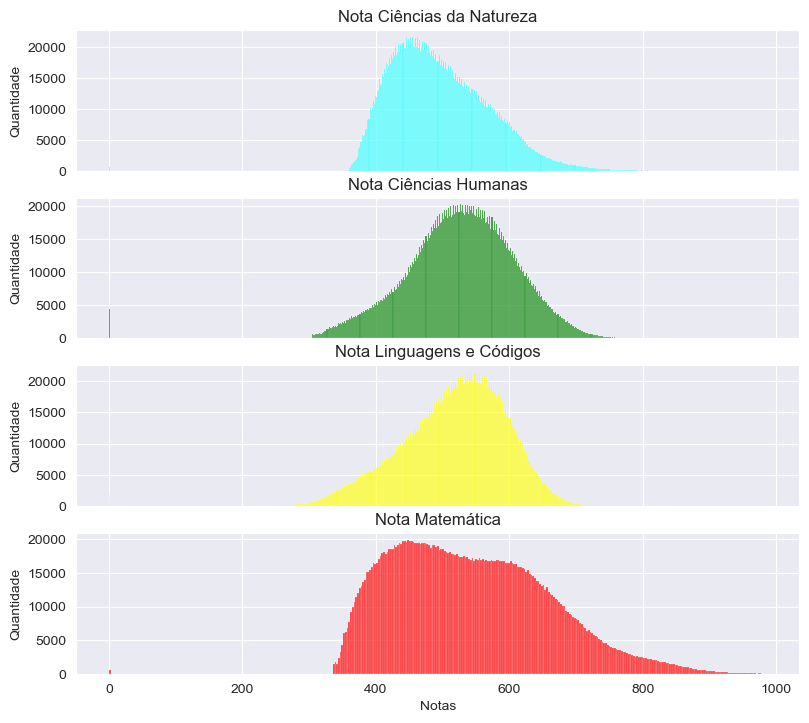

In [19]:
# Analisando a distribuição das notas com histograma
# Setando estilo e criando subplots
sns.set_style("darkgrid")
figura, axes = plt.subplots(4,1, sharex= True, figsize=(8,7))
plt.tight_layout()

# Plotando os histogramas 
for i in range(len(colunas_notas_obj)):
    sns.histplot(data=df_enem, x=colunas_notas_obj[i], ax = axes[i], color = cores[i]).set_title(f"{nomes[i]}")

# Tirando a legenda do eixo x do último gráfico    
axes[3].set_xlabel("Notas", fontsize = 10)

# Plotando no eixo y de cada subplot
for i in range(4):
    axes[i].set_ylabel("Quantidade", fontsize = 10)

plt.show()

Conforme os gráficos de Boxplot apontaram, as notas de Matemática possuem a maior dispersão entre todas. No entanto, apenas tais gráficos não eram suficientes para identificar onde as notas se concentravam. Nesse sentido, além de ratificar que, de fato, as notas em matemática são as mais desbalanceadas, os histogramas também mostram que grande parte destas notas se encontra entre 400 e 500 pontos, o que revela dois possíveis fatores (que podem ocorrer simultaneamente):
1) Existe uma grande disparidade de recursos entre os participantes, o que explica os diferentes níveis educacionais e, por conseguinte, os dissemelhantes graus de desempenho na prova de matemática.
2) Historicamente as notas das provas de matemática alcançam maiores patameres, o que pode ocorrer em virtude da teoria de resposta ao item (TRI) e o nivelamento das questões.

## <a> Notas da redação </a>

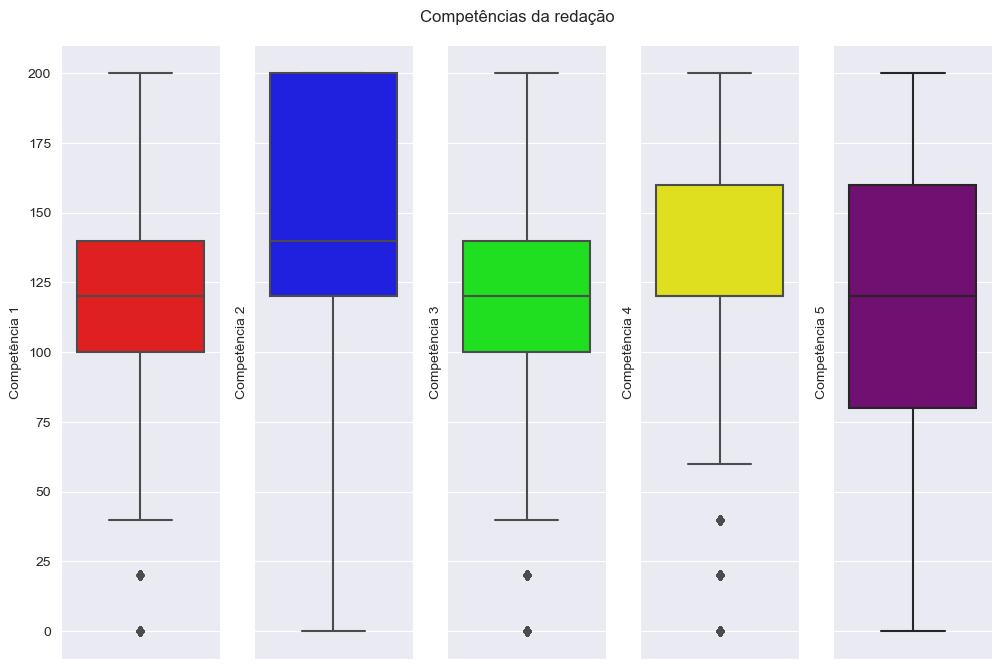

In [20]:
# Analisando as notas relativas a redação
sns.set_style("darkgrid")
figura, axes = plt.subplots(1,5, figsize=(10,7), sharey = True)
plt.suptitle("Competências da redação")
plt.tight_layout()

# Definindo as cores 
colors = ["#FF0000", "#0000FF", "#00FF00", "#FFFF00", "#800080"]

# Plotando os gráficos
for i in range(len(colunas_notas_red)-1):
    sns.boxplot(data=df_enem, y=colunas_notas_red[i], ax = axes[i], color = colors[i])

# Colocando legenda em cada um dos gráficos
names = {0:"Competência 1", 1:"Competência 2", 2:"Competência 3", 3:"Competência 4", 4:"Competência 5"}
for i in range(len(names)):
    axes[i].set_ylabel(f"{(names[i])}")


plt.show()

Analisando os gráficos apresentados, conjuntamente com as informações que a biblioteca Pandas fornece com o método describe, percebe-se que as competências 1 e 3 apresentam separatrizes idênticas, revelando, por exemplo, que para ambas, apenas 25% dos participantes tiram notas maiores que 140. Isso pode ocorrer em virtude da dificuldade que essas competências apresentam, sendo a competência 1 relacionada ao domínio da modalidade escrita formal da Língua Portuguesa, e a competência 3 à capacidade de interpretação e argumentação.

Para checar essa possibilidade, é necessário visualizar as distribuições das competências.

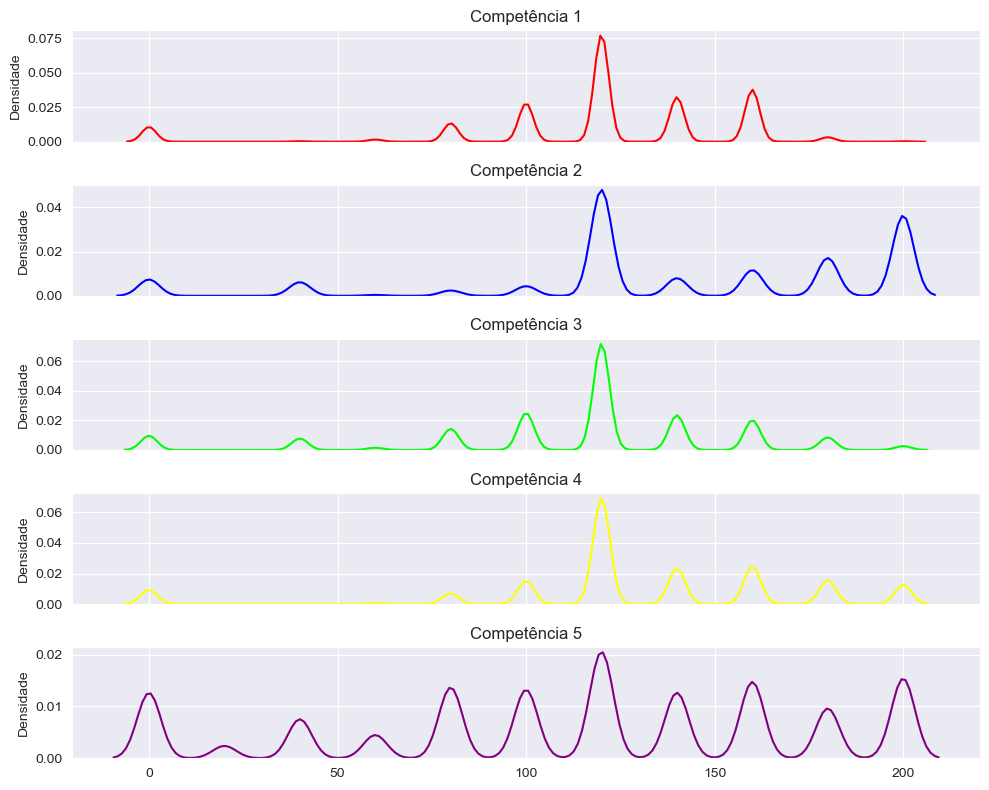

In [21]:
# Setando estilo e Plotando subplots
sns.set_style("darkgrid")
figura, axes = plt.subplots(5,1, figsize=(10,8), sharex= True)

# Plotando nos axes
for i in range(len(colunas_notas_red)-1):
    sns.kdeplot(data=df_enem[f'NU_NOTA_COMP{i+1}'], ax = axes[i], color = colors[i]).set_title(f"{names[i]}")

# Apagando a legenda do eixo x do último gráfico 
axes[4].set_xlabel("")

# Plotando no eixo y de cada subplot
for i in range(5):
    axes[i].set_ylabel("Densidade")

plt.tight_layout()    
plt.show()

In [22]:
# Visualizando a moda das competências 1 e 3
df_enem['NU_NOTA_COMP1'].mode()[0], df_enem['NU_NOTA_COMP3'].mode()[0]

(120.0, 120.0)

Com base nesses dados, vemos que, de fato, as competências 1 e 3 têm distribuições muito concentradas. Apesar de todas as competências apresentarem concentração de notas na faixa dos 120 pontos, 1 e 3 são as que obtém maiores valores no eixo y no gráfico de densidade. Essa informação pode ser útil para escolas públicas e privadas, uma vez que permite mapear um dos gargalos referentes ao desempenho dos estudantes na prova de redação. 

Outra competência que demonstra ter sua distribuição também bastante concentrada é a 4, que corresponde ao conhecimento dos mecanismos linguísticos necessários para a construção da argumentação. Auxiliar alunos nessas 3 etapas da redação pode ser um diferencial no que diz respeito à aprovação destes numa instituição de ensino superior pública ou privada. 

In [23]:
# Mediana das notas de redação
df_enem['NU_NOTA_REDACAO'].median()

620.0

In [24]:
# Comparando algumas estatísticas descritivas entre as 5 notas da prova do ENEM
df_comparacao = df_enem[['NU_NOTA_REDACAO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']].describe()
df_comparacao

NU_NOTA_REDACAO  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT
count          2493442     2355395     2493442     2493442     2355395
mean               618         496         527         517         543
std                212          72          81          78         116
min                  0           0           0           0           0
25%                520         440         477         468         449
50%                620         486         530         526         531
75%                760         543         582         573         622
max               1000         875         839         801         986

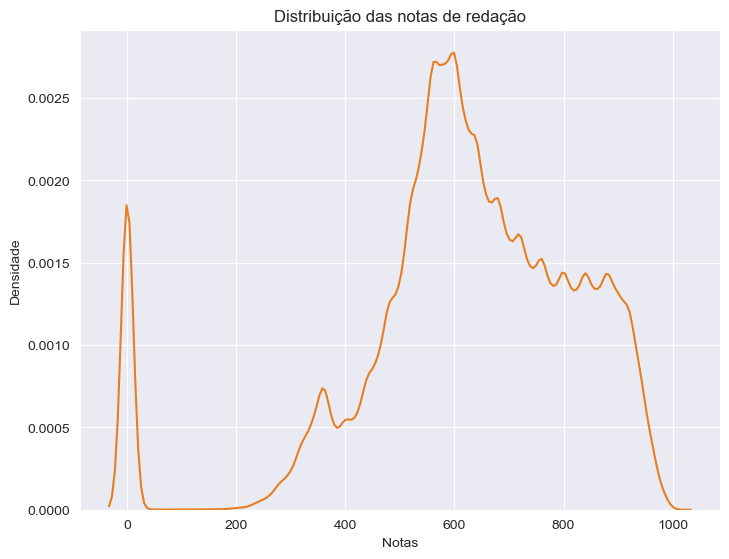

In [25]:
# Criando objetos para visualização 
figura = plt.figure()
axes = figura.add_axes([0,0,1,1])

# Plotando no axes criado
sns.kdeplot(data=df_enem['NU_NOTA_REDACAO'], color = "#e67e22", ax = axes).set_title("Distribuição das notas de redação")

# Colocando legenda nos eixos x e y
axes.set_xlabel("Notas", fontsize = 10)
axes.set_ylabel("Densidade", fontsize = 10)
plt.show()

Embora a mediana e a média das notas de redação sejam as maiores entre todas as provas, é interessante notar que a distribuição do desempenho na redação também segue essa tendência, sendo a mais dispersa dentre todas as outras provas.

## <a> Notas gerais </a>

Na tentativa de calcular a média aritmética das notas dos participantes, que, geralmente, é a nota que é aceita pela maioria das universidades por meio do SISU (Sistema de Seleção Unificada), percebemos que são poucos os candidatos que compareceram nos dois dias de prova, o que significa que teremos muitos valores faltantes no cálculo da nota média de cada participante, impossibilitando a operação em sua totalidade. Sendo assim, será utilizada uma abordagem mais restrita, em que serão calculadas as notas gerais (média aritmética das 5) dos participantes que compareceram aos dois dias de prova e não deixaram a redação em branco. Isso será feito para considerar apenas os candidatos que tiveram a disponibilidade de tentar alcançar resultados significantes com a nota da prova.

In [26]:
# Selecionando os participantes que compareceram aos dois dias de prova (e não deixaram a prova de redação em branco)
df_2d = df_enem.loc[(df_enem['TP_PRESENCA_CN'] ==  1) & (df_enem['TP_PRESENCA_LC'] == 1) &
        (df_enem['TP_PRESENCA_CH'] ==  1) & (df_enem['TP_PRESENCA_MT'] ==  1) & (df_enem['TP_STATUS_REDACAO'] != 4),:]
                                                                                 

# Calculando o percentual destes participantes no total
print(f'''{((df_2d.shape[0]/df_enem.shape[0]) * 100):.2f}% dos participantes compareceram aos dois dias de prova
e não deixaram a redação em branco (mesmo que alguns tenham zerado por outros motivos)''')

66.36% dos participantes compareceram aos dois dias de prova
e não deixaram a redação em branco (mesmo que alguns tenham zerado por outros motivos)


In [27]:
# Criando uma cópia do DataFrame de quem compareceu nos dois dias e esteve na prova de redação
df_2dcopy = df_2d.copy()

# Calculando a média aritmética das notas desses participantes (nota do SISU)
df_2dcopy['NOTA_MEDIA'] = (df_2dcopy['NU_NOTA_REDACAO'] + df_2dcopy['NU_NOTA_CN'] + df_2dcopy['NU_NOTA_CH'] + 
                        df_2dcopy['NU_NOTA_LC'] + df_2dcopy['NU_NOTA_MT'])/5

# Visualizando as 10 primeiras linhas
df_2dcopy.head(10)

TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
2                 5       F                1            2                 1   
3                 6       M                1            3                 1   
7                 6       F                1            2                 1   
9                 4       F                1            3                 1   
11                2       F                1            1                 1   
17                2       F                1            3                 1   
18                8       F                1            2                 1   
22                4       F                1            1                 1   
23                4       M                1            3                 1   
25                5       M                1            3                 1   

    TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  \
2                 1                2          1        NaN             0   
3                 1                2          1        NaN             0   
7                 1                0          1        NaN             0   
9                 1                1          1        NaN             0   
11                2                0          3          1             0   
17                3                0          1        NaN             1   
18                1                5          1        NaN             0   
22                1                0          1        NaN             0   
23                1                1          1        NaN             0   
25                1                4          1        NaN             0   

   NO_MUNICIPIO_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
2              None      None                     NaN                 NaN   
3              None      None                     NaN                 NaN   
7              None      None                     NaN                 NaN   
9              None      None                     NaN                 NaN   
11             None      None                     NaN                 NaN   
17             None      None                     NaN                 NaN   
18             None      None                     NaN                 NaN   
22             None      None                     NaN                 NaN   
23             None      None                     NaN                 NaN   
25             None      None                     NaN                 NaN   

    TP_SIT_FUNC_ESC         NO_MUNICIPIO_PROVA SG_UF_PROVA  TP_PRESENCA_CN  \
2               NaN  Presidente Tancredo Neves          BA               1   
3               NaN                  Cariacica          ES               1   
7               NaN                São Gonçalo          RJ               1   
9               NaN                  Arcoverde          PE               1   
11              NaN    Nossa Senhora da Glória          SE               1   
17              NaN              Caraguatatuba          SP               1   
18              NaN                   Ladainha          MG               1   
22              NaN                    Itaguaí          RJ               1   
23              NaN                  Fortaleza          CE               1   
25              NaN    Campo Alegre de Lourdes          BA               1   

    TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  NU_NOTA_CN  NU_NOTA_CH  \
2                1               1               1         421         546   
3                1               1               1         491         389   
7                1               1               1         398         427   
9                1               1               1         468         461   
11               1               1               1         459         540   
17               1               1               1         397         529   
18               1               1          

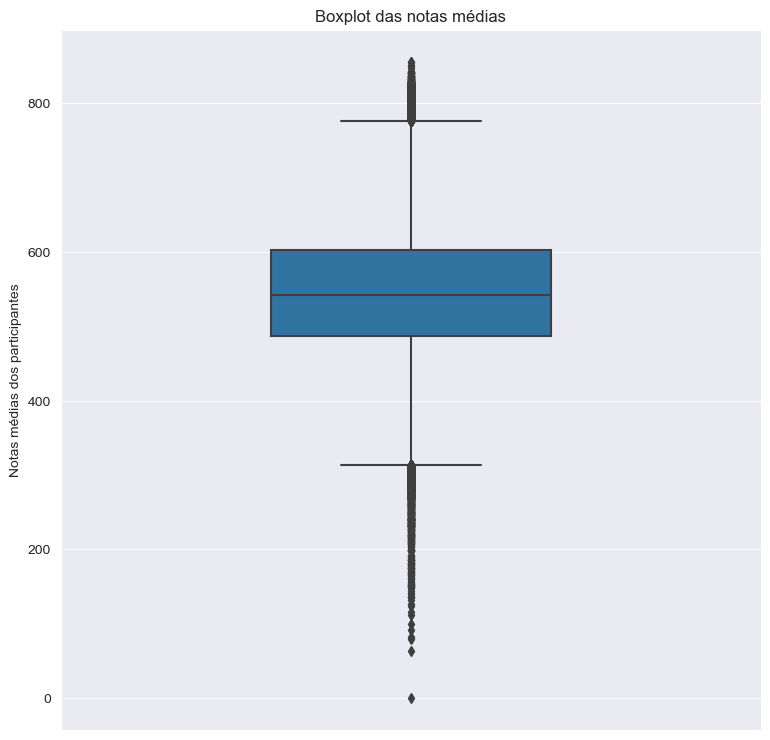

In [28]:
# Visualizando o boxplot das notas médias
figura = plt.figure(figsize=(7,7))

# Adicionando axes 
axes = figura.add_axes([0,0,1,1])

# Plotando no axes e setando legendas
sns.boxplot(data=df_2dcopy, y= 'NOTA_MEDIA', ax = axes, width=0.4).set_title("Boxplot das notas médias")
axes.set_ylabel("Notas médias dos participantes", fontsize = 10)
plt.show()

In [29]:
# Visualizando o 95º percentil
df_2dcopy['NOTA_MEDIA'].quantile(0.95)

693.84

In [30]:
# Vendo o valor mais frequente das notas médias (moda)
df_2dcopy['NOTA_MEDIA'].mode()

0   535
Name: NOTA_MEDIA, dtype: float64

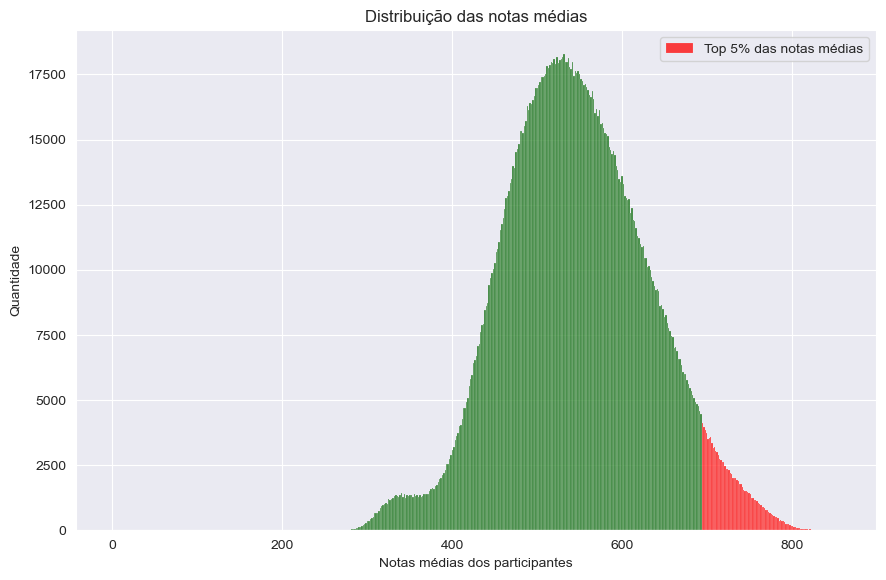

In [31]:
# Vendo a distribuição das notas médias (das pessoas que compareceram aos dois dias e não deixaram a redação em branco)
figura = plt.figure(figsize=(8,5))

# Adicionando axes
axes = figura.add_axes([0,0,1,1])

# Criando Dataframe com notas médias menores que o 95º percentil a partir do DataFrame original
df_menosque95 = df_2dcopy.loc[df_2dcopy['NOTA_MEDIA'] < df_2dcopy['NOTA_MEDIA'].quantile(0.95)]

# Plotando notas menores que o 95º percentil
sns.histplot(data=df_menosque95['NOTA_MEDIA'], ax = axes, color = "#006400").set_title("Distribuição das notas médias")

# Criando DataFrame com notas médias maiores que o 95º percentil a partir do DataFrame original
df_maisque95 = df_2dcopy.loc[df_2dcopy['NOTA_MEDIA'] >= df_2dcopy['NOTA_MEDIA'].quantile(0.95)]

# Plotando 5% das maiores notas médias 
sns.histplot(data = df_maisque95['NOTA_MEDIA'], ax = axes, color = "#FF0000", label = "Top 5% das notas médias")

# Definindo legendas 
axes.set_ylabel("Quantidade")
axes.set_xlabel("Notas médias dos participantes")
axes.legend()
plt.show()

Analisando as notas médias dos participantes que compareceram aos dois dias de prova e não deixaram a redação em branco, percebe-se o reflexo da gigantesca diferença do nível educacional na população. O 95º percentil, desses participantes, equivale a 693,84 pontos, o que significa que apenas 5% dos participantes conseguem alcançar notas maiores que esta. Essa informação é fundamental para demonstrar o nível de carência que a educação brasileira apresenta.

Além disso, também é possível identificar que as notas estão muito concentradas entre 450 e 600 pontos, mais um indicador do grau de disparidade do nível educacional.

## <a> Analisando as informações demográficas </a>

In [32]:
# Visualizando as 5 primeiras linhas do DataFrame
df_enem.head()

TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
0               14       M                2            2                 1   
1               14       M                2            1                 1   
2                5       F                1            2                 1   
3                6       M                1            3                 1   
4                4       M                0            3                 1   

   TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  \
0                1                2          1        NaN             0   
1                1               16          1        NaN             0   
2                1                2          1        NaN             0   
3                1                2          1        NaN             0   
4                1                1          1        NaN             0   

  NO_MUNICIPIO_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
0             None      None                     NaN                 NaN   
1             None      None                     NaN                 NaN   
2             None      None                     NaN                 NaN   
3             None      None                     NaN                 NaN   
4             None      None                     NaN                 NaN   

   TP_SIT_FUNC_ESC         NO_MUNICIPIO_PROVA SG_UF_PROVA  TP_PRESENCA_CN  \
0              NaN                   Brasília          DF               0   
1              NaN                   Brasília          DF               0   
2              NaN  Presidente Tancredo Neves          BA               1   
3              NaN                  Cariacica          ES               1   
4              NaN                Salinópolis          PA               0   

   TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  NU_NOTA_CN  NU_NOTA_CH  \
0               0               0               0         NaN         NaN   
1               0               0               0         NaN         NaN   
2               1               1               1         421         546   
3               1               1               1         491         389   
4               0               0               0         NaN         NaN   

   NU_NOTA_LC  NU_NOTA_MT  TP_LINGUA  TP_STATUS_REDACAO  NU_NOTA_COMP1  \
0         NaN         NaN          0                NaN            NaN   
1         NaN         NaN          0                NaN            NaN   
2         499         565          1                  1            140   
3         358         416          1                  1            120   
4         NaN         NaN          0                NaN            NaN   

   NU_NOTA_COMP2  NU_NOTA_COMP3  NU_NOTA_COMP4  NU_NOTA_COMP5  \
0            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN   
2            200            120            140            160   
3             40             40            100             20   
4            NaN            NaN            NaN            NaN   

   NU_NOTA_REDACAO Q001 Q002 Q003 Q004  Q005 Q006 Q007 Q008 Q009 Q010 Q011  \
0              NaN    A    A    A    B     3    B    B    B    B    B    B   
1              NaN    D    D    E    E     3    Q    D    E    E    E    E   
2              760    E    F    A    D     2    B    A    B    C    A    A   
3              320    C    A    A    B     3    A    A    C    D    A    A   
4              NaN    D    B    A    B     2    B    A    B    B    A    A   

  Q012 Q013 Q014 Q015 Q016 Q017 Q018 Q019 Q020 Q021 Q022 Q023 Q024 Q025  
0    B    A    B    B    B    A    A    A    A    A    A    A    A    A  
1    E    E    E    E    E    E    B    E    B    B    E    B    E    B  
2    B    B    A    A    A    A    A    A    A    A    C    A    A    B  
3    B    A    B    A    B    A    A    C    A    A    C    B    B    B  
4    B    A    A    A    

## <a> Idade </a>

Como as idades da base de microdados do ENEM 2022 estão em faixas (intervalos), é necessário trocá-las para números inteiros a fim de se ter uma melhor visualização de sua distribuição. Sendo assim, é esperado que se percam algumas informações no processo de criação de outra coluna. Isso ocorre pois as idades serão trocadas pela mediana de seu intervalo. No caso dos participantes menores de 17 anos, será considerado que a idade mínima deste intervalo é de 11 anos. Dessa forma, qualquer idade que seja menor de 17 anos será trocada pelo valor de 14 anos (mediana desse intervalo). Já no caso de pessoas com mais de 70 anos, será considerado que o intervalo vai de 70 a 85 anos, e tal faixa de idade será substituída pelo valor de 78 anos (mediana desse intervalo). 

Em razão da expectativa de intensa participação de pessoas na faixa de 17 a 40 anos, espera-se que o volume de informação perdida não seja tão substancial, já que é somente a partir de 25 anos que o número de faixas aumenta. Favoravelmente, quando o participante tem de 17 a 25 anos, a base de dados dispõe de sua verdadeira idade, de forma que é possível ter uma informação mais precisa dessa variável.

In [33]:
# Criando uma cópia do DataFrame original para manipulação de dados
df_idades = df_enem.copy()

# Criando as faixas:

# Primeira faixa
primeira_faixa = list(range(11, 18)) 

# Segunda faixa -> 1ª Iteração: range(26,31) -> 2ª Iteração: range(31,36)...
faixas = [list(range(i, i+5)) for i in range(26,71,5)]

# Última faixa
ultima_faixa = list(range(71, 86))

In [34]:
# Criando e preenchendo lista para substituir por faixas de idade
# st se refere a biblioteca 'statistics' 
medianas = []
for i in range(9):
    mediana = st.median(faixas[i])
    medianas.append(mediana)
medianas

[28, 33, 38, 43, 48, 53, 58, 63, 68]

In [35]:
# Substituindo as faixas de idade pela mediana do intervalo 
faixas_idade = {1: st.median(primeira_faixa), 2: 17, 3: 18, 4: 19, 5: 20, 6: 21, 7: 22, 8: 23, 9: 24, 10: 25,
                11: medianas[0], 12: medianas[1], 13: medianas[2], 14: medianas[3], 15: medianas[4], 16: medianas[5],
                17: medianas[6], 18: medianas[7], 19: medianas[8], 20: st.median(ultima_faixa)}

# Criando nova coluna com as idades fora de intervalos e mostrando o antes e depois com 5 linhas
df_idades['IDADES'] = df_idades['TP_FAIXA_ETARIA'].map(faixas_idade)
df_idades.loc[:4, ['TP_FAIXA_ETARIA','IDADES']]

TP_FAIXA_ETARIA  IDADES
0               14      43
1               14      43
2                5      20
3                6      21
4                4      19

In [36]:
# Analisando as idades dos candidatos
df_idades['IDADES'].value_counts()

18    805862
17    711278
19    408115
14    303605
20    247679
28    189700
21    165982
22    123260
33    103634
23     94849
38     74162
24     73338
25     61564
43     49735
48     30066
53     17688
58      9688
63      3817
68      1505
78       578
Name: IDADES, dtype: int64

In [37]:
# Analisando as idades dos participantes 
df_idades['IDADES'].value_counts().sort_index()

14    303605
17    711278
18    805862
19    408115
20    247679
21    165982
22    123260
23     94849
24     73338
25     61564
28    189700
33    103634
38     74162
43     49735
48     30066
53     17688
58      9688
63      3817
68      1505
78       578
Name: IDADES, dtype: int64

In [38]:
# Calculando a moda das idades
df_idades['IDADES'].mode()

0    18
Name: IDADES, dtype: int64

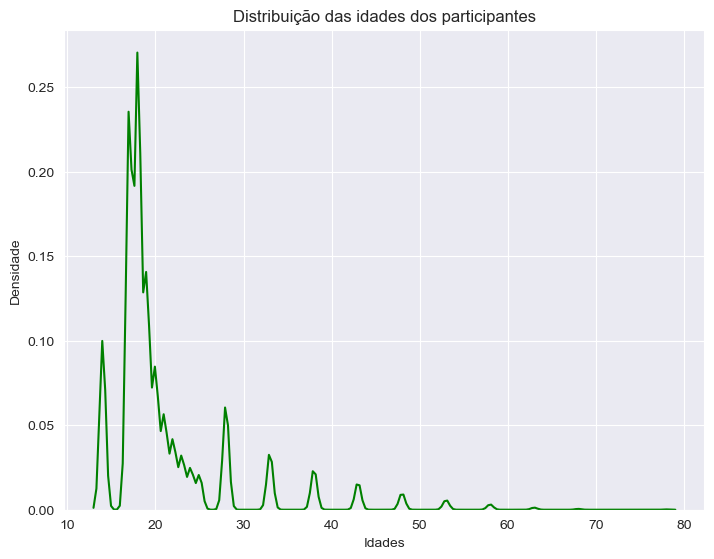

In [39]:
# Criando objetos para visualização
figura = plt.figure()
axes = figura.add_axes([0,0,1,1])

# Visualizando a distribuição de idades
sns.kdeplot(data=df_idades, x='IDADES', color = "#008000", ax = axes).set_title("Distribuição das idades dos participantes")

# Colocando legendas 
axes.set_xlabel("Idades", fontsize = 10)
axes.set_ylabel("Densidade", fontsize = 10)
plt.show()

Como é possível perceber, em virtude das manipulações que foram feitas nos dados, o Kernel Density Plot não apresentou a sua suavidade característica. Isso ocorreu pois o tratamento feito ignorou a existência de algumas idades, já que estas foram dispostas em intervalos pela base de microdados do ENEM 2022, e era necessário, portanto, converter esse intervalo em um número.

No entanto, um fator interessante é a concentração das idades na faixa de 17 a 19 anos (sendo a moda igual a 18 anos), o que confirma a expectativa de maior participação na prova do ENEM por essa faixa etária.

## <a> Sexo </a>

In [40]:
# Visualizando a frequência dos sexos
df_enem['TP_SEXO'].value_counts()

F    2120519
M    1355586
Name: TP_SEXO, dtype: int64

In [41]:
# Visualizando em porcentagem 
df_enem['TP_SEXO'].value_counts(normalize = True)* 100

F   61
M   39
Name: TP_SEXO, dtype: float64

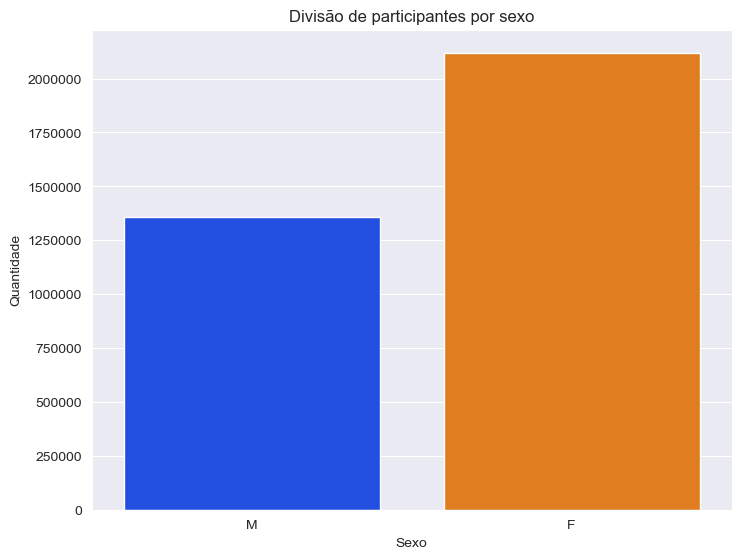

In [42]:
# Criando objetos para visualização (Countplot)
figura = plt.figure()
axes = figura.add_axes([0,0,1,1])

# Setando paleta
sns.set_palette("bright")

# Definindo tamanho da figure e plotando o countplot
sns.countplot(data=df_enem, x ='TP_SEXO', ax = axes).set_title("Divisão de participantes por sexo")

# Removendo a notação científica do eixo y
axes.ticklabel_format(style='plain', axis='y')

# Definindo legendas
axes.set_xlabel("Sexo", fontsize = 10)
axes.set_ylabel("Quantidade", fontsize = 10)

plt.show()

Temos cerca de 39% de homens e 61% de mulheres compondo o total de participantes.

## <a> Estado Civil </a>

In [43]:
# Fazendo um novo DataFrame para manipular dados de Estado Civil
df_estadociv = df_enem.copy()

# Definindo os valores para substituir
estado_civil = {0: "Não Informado", 1: "Solteiro", 2:"Casado(a)/Mora com companheiro(a)",
                3:"Divorciado(a)/Desquitado(a)/Separado(a)", 4: "Viúvo(a)"}

# Substituindo em uma nova coluna e comparando o antes e depois, mostrando as 7 primeiras linhas
df_estadociv['ESTADO_CIVIL'] = df_estadociv['TP_ESTADO_CIVIL'].map(estado_civil)
df_estadociv.loc[:6, ['TP_ESTADO_CIVIL', 'ESTADO_CIVIL']]

TP_ESTADO_CIVIL                       ESTADO_CIVIL
0                2  Casado(a)/Mora com companheiro(a)
1                2  Casado(a)/Mora com companheiro(a)
2                1                           Solteiro
3                1                           Solteiro
4                0                      Não Informado
5                1                           Solteiro
6                1                           Solteiro

In [44]:
# Visualizando os grupos por Estado Civil
df_estadociv['ESTADO_CIVIL'].value_counts().sort_values(ascending = False)

Solteiro                                   3127949
Casado(a)/Mora com companheiro(a)           165719
Não Informado                               128493
Divorciado(a)/Desquitado(a)/Separado(a)      50380
Viúvo(a)                                      3564
Name: ESTADO_CIVIL, dtype: int64

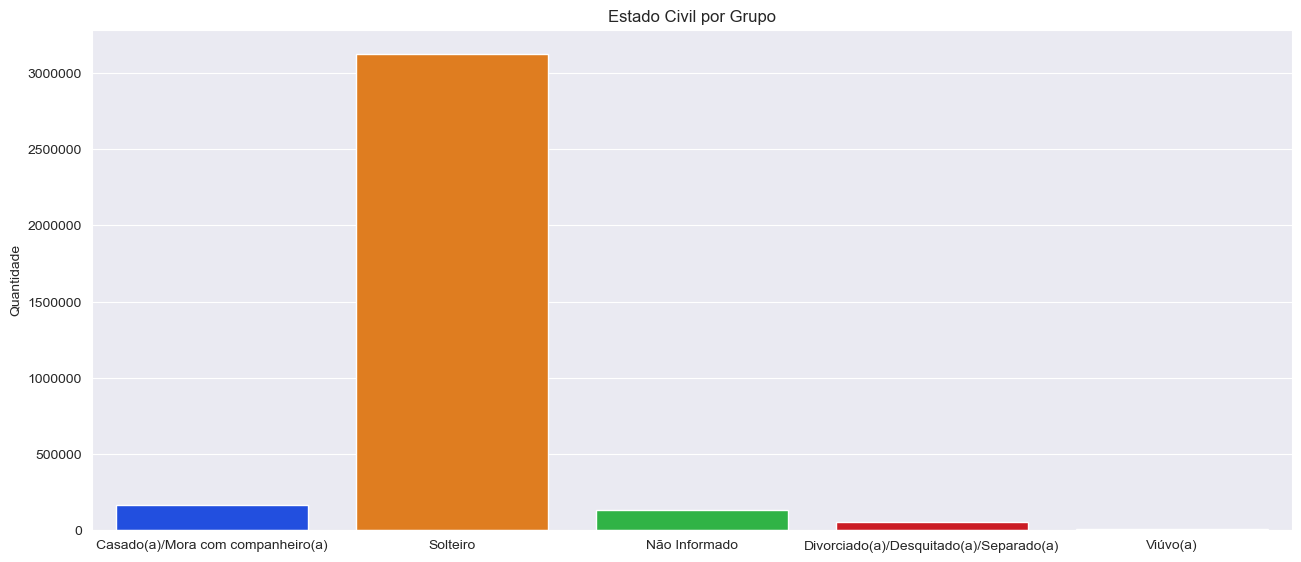

In [45]:
# Criando objetos para visualização (Countplot)
figura = plt.figure(figsize=(12,5))
axes = figura.add_axes([0,0,1,1])

# Definindo paleta de cores
sns.set_palette("bright")

# Plotando 
sns.countplot(data=df_estadociv, x = 'ESTADO_CIVIL', ax = axes).set_title("Estado Civil por Grupo")

# Tirando notação científica do gráfico
axes.ticklabel_format(style='plain', axis='y')

# Definindo legendas 
axes.set_xlabel("")
axes.set_ylabel("Quantidade", fontsize = 10)

# Mostrando o gráfico
plt.show()

Percebemos que há uma disparidade substancial entre os grupos, por estado civil, que participaram da prova do ENEM 2022, sendo a maior parte composta por participantes solteiros.

## <a> Raça </a>

In [46]:
# Criando um novo df para manipulação dos dados de raça
df_raca = df_enem.copy()

# Construíndo um dicionário para substituição pelas devidas categorias
cor_raca = {0: "Não declarado", 1: "Branca", 2: "Preta", 3: "Parda", 4: "Amarela", 5: "Indígena", 6: "Não dispõe da informação"}

# Criando nova coluna e substituindo
df_raca['COR_RACA'] = df_raca['TP_COR_RACA'].map(cor_raca)

# Visualizando as 5 primeiras linhas da coluna nova e antiga
df_raca.loc[:4,['COR_RACA', 'TP_COR_RACA']]

COR_RACA  TP_COR_RACA
0    Preta            2
1   Branca            1
2    Preta            2
3    Parda            3
4    Parda            3

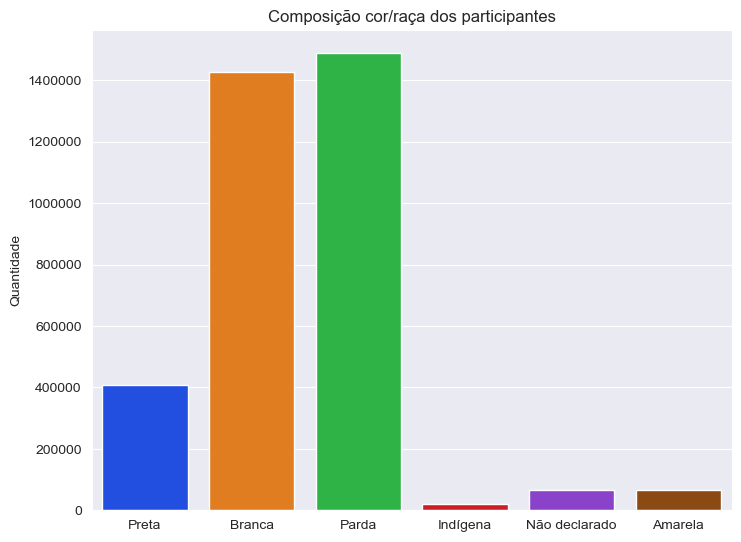

In [47]:
# Criando objetos para visualização (Countplot)
figura = plt.figure()
axes = figura.add_axes([0,0,1,1])

# Plotando e tirando notação científica do gráfico 
sns.countplot(data=df_raca, x ='COR_RACA', ax = axes).set_title("Composição cor/raça dos participantes")
axes.ticklabel_format(style='plain', axis='y')

# Colocando legendas
plt.xlabel("")
plt.ylabel("Quantidade")

# Mostrando o gráfico
plt.show()

De acordo com o gráfico, se torna nítido que pardos e pretos, juntos, ocupam a maior parte da distribuição por raça/cor. No entanto, a parcela de brancos acompanha a quantidade de pardos. Além disso, percebe-se que as demais categorias, somadas, não superam a quantidade de pretos.

## <a> Localidade </a>

Como existem muitos dados faltantes nas colunas referentes ao município e unidade federativa das escolas dos participantes, serão utilizadas as colunas relacionadas ao local de aplicação da prova para visualizar as tendências de distribuição de localidade dos participantes.

In [48]:
# Analisando a quantidade de participantes por unidade federativa
ufs = df_enem['SG_UF_PROVA'].value_counts().sort_values(ascending = False)
ufs

SP    544442
MG    309781
BA    265166
RJ    250890
CE    226377
PA    202621
PE    189595
RS    152295
PR    150396
GO    141622
MA    132916
PB    103238
RN     88049
PI     84400
SC     82791
AM     80986
DF     65401
AL     63945
ES     63700
MT     59381
SE     58312
MS     44683
RO     31969
TO     29440
AP     22674
AC     22601
RR      8434
Name: SG_UF_PROVA, dtype: int64

In [49]:
# Analisando a quantidade de participantes por município
mcp = df_enem['NO_MUNICIPIO_PROVA'].value_counts()

# Visualiazndo os 5 municípios com mais participantes
mcp.head()

São Paulo         147046
Rio de Janeiro    105397
Fortaleza          71714
Brasília           65401
Belém              59976
Name: NO_MUNICIPIO_PROVA, dtype: int64

In [50]:
# Fazendo uma cópia para manipular dados de localidade
df_localidade = df_enem.copy()

# Pegando só as informações necessárias
df_localidade = df_localidade.loc[:, ['SG_UF_PROVA', 'NO_MUNICIPIO_PROVA']]

# Definindo o df, agrupando por UF e município
df_localidade = pd.DataFrame(df_localidade.groupby(['SG_UF_PROVA', 'NO_MUNICIPIO_PROVA']).value_counts().reset_index())

# Trocando o nome da coluna de 0 para 'Participantes' 
df_localidade.rename(columns={0: 'Participantes'}, inplace=True)

# Visualizando df final
df_localidade.head()

SG_UF_PROVA NO_MUNICIPIO_PROVA  Participantes
0          AC         Acrelândia            314
1          AC          Brasiléia            407
2          AC    Cruzeiro do Sul           3426
3          AC     Epitaciolândia            249
4          AC              Feijó            422

In [51]:
# Criando novo DataFrame para visualizar cidades com mais participantes
df_ordem = df_localidade.sort_values(by= 'Participantes', ascending = False).reset_index()

# Mais participantes
display(df_ordem.head())

# Menos participantes
display(df_ordem.tail())

index SG_UF_PROVA NO_MUNICIPIO_PROVA  Participantes
0   1696          SP          São Paulo         147046
1   1225          RJ     Rio de Janeiro         105397
2    308          CE          Fortaleza          71714
3    388          DF           Brasília          65401
4    860          PA              Belém          59976

index SG_UF_PROVA   NO_MUNICIPIO_PROVA  Participantes
1742      5          AC               Jordão             57
1743   1723          TO   Brejinho de Nazaré             53
1744   1524          SP       Barra do Turvo             51
1745     70          AM               Japurá             48
1746   1013          PE  Fernando de Noronha             36

In [52]:
# Visualizando dados de localidade num Treemap
fig = px.treemap(data_frame=df_localidade,
                 path = ['SG_UF_PROVA','NO_MUNICIPIO_PROVA'], values = 'Participantes')

# Colocando borda cinza e ajustando margens
fig.update_traces(root_color = 'lightgrey')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

A cidade com maior número de participantes é São Paulo, que contou com pouco mais de 147 mil candidatos. Embora seja concebido como um distrito, a base de microdados do ENEM 2022 caracteriza Fernando de Noronha como um município. Foi nesse local em que se encontrou o menor número de participantes, 36. 

## <a> Questionários </a>

In [53]:
# Analisando as repostas do questionário Q001 "Até que série seu pai, ou o homem responsável por você, estudou?"
'''
A Nunca estudou.
B Não completou a 4ª série/5º ano do Ensino Fundamental.
C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
E Completou o Ensino Médio, mas não completou a Faculdade.
F Completou a Faculdade, mas não completou a Pós-graduação.
G Completou a Pós-graduação.
H Não sei.
'''
# Contagem por respostas
df_enem['Q001'].value_counts().sort_index()

A     139728
B     601131
C     456924
D     388901
E    1002676
F     316880
G     236316
H     333549
Name: Q001, dtype: int64

In [54]:
# Calculando a porcentagem de participantes que responderam que não sabem a escolaridade do pai
'{:.2f}%'.format((len(df_enem.loc[df_enem['Q001'] == 'H', :])/df_enem.shape[0]) * 100)

'9.60%'

In [55]:
# Calculando a porcentagem de participantes que responderam que o pai nunca estudou
'{:.2f}%'.format(((len(df_enem.loc[df_enem['Q001'] == 'A', :])/df_enem.shape[0]) * 100)) 

'4.02%'

In [56]:
# Analisando as repostas do questionário Q002 "Até que série sua mãe, ou a mulher responsável por você, estudou?"
'''
A Nunca estudou.
B Não completou a 4ª série/5º ano do Ensino Fundamental.
C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
E Completou o Ensino Médio, mas não completou a Faculdade.
F Completou a Faculdade, mas não completou a Pós-graduação.
G Completou a Pós-graduação.
H Não sei.
'''
# Contagem por respostas
df_enem['Q002'].value_counts().sort_index()

A      89040
B     431585
C     386363
D     415361
E    1217025
F     424771
G     402007
H     109953
Name: Q002, dtype: int64

In [57]:
# Calculando a porcentagem de participantes que responderam que não sabem a escolaridade da mãe
'{:.2f}%'.format((len(df_enem.loc[df_enem['Q002'] == 'H', :])/df_enem.shape[0]) * 100)

'3.16%'

In [58]:
# Calculando a porcentagem de participantes que responderam que a mãe nunca estudou
'{:.2f}%'.format((len(df_enem.loc[df_enem['Q002'] == 'A', :])/df_enem.shape[0]) * 100)

'2.56%'

In [59]:
# Criando cópia para manipular dados acerca da escolaridade
df_sup = df_enem.copy() 

# Criando coluna que indica se o pai tem ensino superior
df_sup['PAI_ENS_SUPERIOR'] = df_sup['Q001'].isin(['F','G'])

# Criando coluna que indica se a mãe tem ensino superior
df_sup['MAE_ENS_SUPERIOR'] = df_sup['Q002'].isin(['F', 'G'])

# Visualizando df 
df_sup.head()

TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
0               14       M                2            2                 1   
1               14       M                2            1                 1   
2                5       F                1            2                 1   
3                6       M                1            3                 1   
4                4       M                0            3                 1   

   TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  \
0                1                2          1        NaN             0   
1                1               16          1        NaN             0   
2                1                2          1        NaN             0   
3                1                2          1        NaN             0   
4                1                1          1        NaN             0   

  NO_MUNICIPIO_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
0             None      None                     NaN                 NaN   
1             None      None                     NaN                 NaN   
2             None      None                     NaN                 NaN   
3             None      None                     NaN                 NaN   
4             None      None                     NaN                 NaN   

   TP_SIT_FUNC_ESC         NO_MUNICIPIO_PROVA SG_UF_PROVA  TP_PRESENCA_CN  \
0              NaN                   Brasília          DF               0   
1              NaN                   Brasília          DF               0   
2              NaN  Presidente Tancredo Neves          BA               1   
3              NaN                  Cariacica          ES               1   
4              NaN                Salinópolis          PA               0   

   TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  NU_NOTA_CN  NU_NOTA_CH  \
0               0               0               0         NaN         NaN   
1               0               0               0         NaN         NaN   
2               1               1               1         421         546   
3               1               1               1         491         389   
4               0               0               0         NaN         NaN   

   NU_NOTA_LC  NU_NOTA_MT  TP_LINGUA  TP_STATUS_REDACAO  NU_NOTA_COMP1  \
0         NaN         NaN          0                NaN            NaN   
1         NaN         NaN          0                NaN            NaN   
2         499         565          1                  1            140   
3         358         416          1                  1            120   
4         NaN         NaN          0                NaN            NaN   

   NU_NOTA_COMP2  NU_NOTA_COMP3  NU_NOTA_COMP4  NU_NOTA_COMP5  \
0            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN   
2            200            120            140            160   
3             40             40            100             20   
4            NaN            NaN            NaN            NaN   

   NU_NOTA_REDACAO Q001 Q002 Q003 Q004  Q005 Q006 Q007 Q008 Q009 Q010 Q011  \
0              NaN    A    A    A    B     3    B    B    B    B    B    B   
1              NaN    D    D    E    E     3    Q    D    E    E    E    E   
2              760    E    F    A    D     2    B    A    B    C    A    A   
3              320    C    A    A    B     3    A    A    C    D    A    A   
4              NaN    D    B    A    B     2    B    A    B    B    A    A   

  Q012 Q013 Q014 Q015 Q016 Q017 Q018 Q019 Q020 Q021 Q022 Q023 Q024 Q025  \
0    B    A    B    B    B    A    A    A    A    A    A    A    A    A   
1    E    E    E    E    E    E    B    E    B    B    E    B    E    B   
2    B    B    A    A    A    A    A    A    A    A    C    A    A    B   
3    B    A    B    A    B    A    A    C    A    A    C    B    B    B   
4    B    A    A    

In [60]:
# Visualizando a porcentagem de pais com (True) e sem ensino superior (False)
df_sup['PAI_ENS_SUPERIOR'].value_counts(normalize = True) * 100

False   84
True    16
Name: PAI_ENS_SUPERIOR, dtype: float64

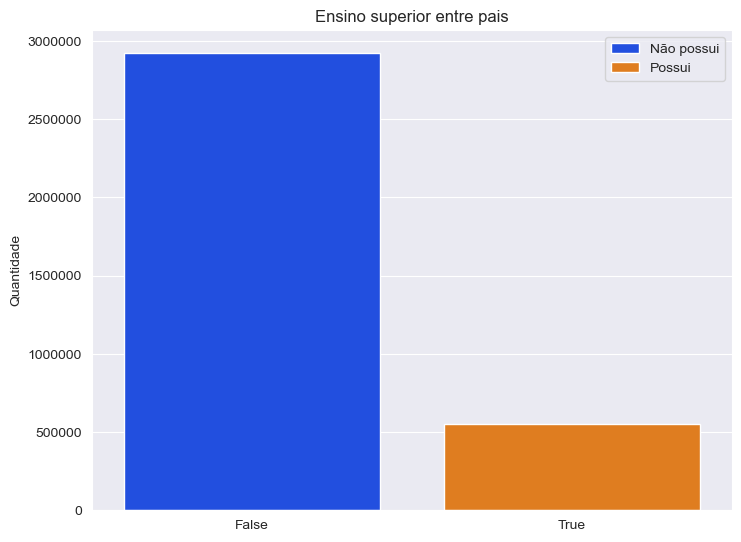

In [61]:
# Criando objetos para visualização
figura = plt.figure()
axes = figura.add_axes([0,0,1,1])

# Plotando e tirando notação científica do eixo y
sns.countplot(data=df_sup, x = 'PAI_ENS_SUPERIOR', label = ['Não possui','Possui']).set_title("Ensino superior entre pais")
axes.ticklabel_format(style='plain', axis='y')

# Definindo legendas
axes.set_ylabel("Quantidade")
axes.set_xlabel("")
plt.legend()
plt.show()

Mesmo que haja pais cuja escolaridade é desconhecida dentre os pais que não possuem ensino superior, é nítido perceber a gritante diferença entre as duas classes. Pais com ensino superior representam apenas 16% do total.

In [62]:
# Visualizando a porcentagem de mães que tem ensino superior (True) e que não tem (False)
df_sup['MAE_ENS_SUPERIOR'].value_counts(normalize = True) * 100

False   76
True    24
Name: MAE_ENS_SUPERIOR, dtype: float64

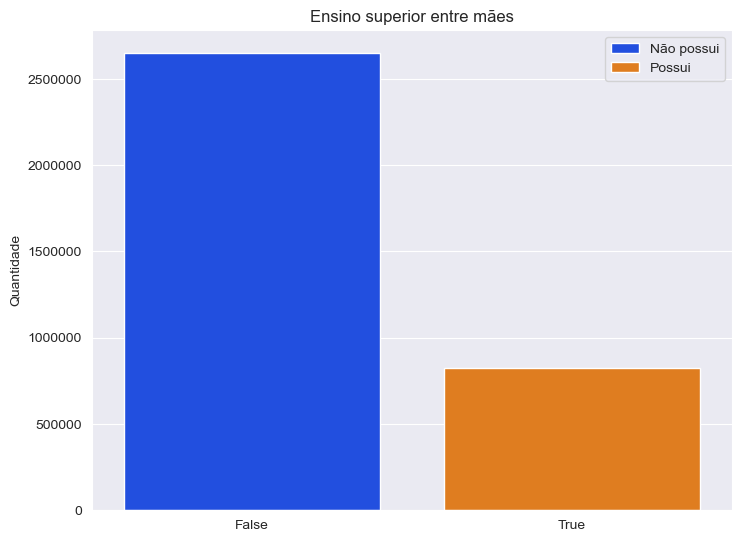

In [63]:
# Criando objetos para visualização
figura = plt.figure()
axes = figura.add_axes([0,0,1,1])

# Plotando e tirando notação científica do eixo y
sns.countplot(data=df_sup, x = 'MAE_ENS_SUPERIOR', label = ['Não possui','Possui']).set_title("Ensino superior entre mães")
axes.ticklabel_format(style='plain', axis='y')

# Definindo legendas
axes.set_ylabel("Quantidade")
axes.set_xlabel("")
plt.legend()
plt.show()

No que diz respeito às mães que possuem ensino superior, observa-se que a discrepância entre as duas classes permanece. No entanto, enquanto os pais com ensino superior compunham 16% do total de pais, as mães com o mesmo nível de escolaridade representam 24% do total de mães. 

A diferença entre pais e mães no quesito nível de escolaridade pode ser o indicativo de uma tendência do aumento da participação de mulheres nas universidades.

In [64]:
# O questionário 'Q006' é uma variável categórica ordinal, vamos transformá-la  

# Q006 -> Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
'''
A Nenhuma renda.
B Até R$ 998,00.
C De R$ 998,01 até R$ 1.497,00.
D De R$ 1.497,01 até R$ 1.996,00.
E De R$ 1.996,01 até R$ 2.495,00.
F De R$ 2.495,01 até R$ 2.994,00.
G De R$ 2.994,01 até R$ 3.992,00.
H De R$ 3.992,01 até R$ 4.990,00.
I De R$ 4.990,01 até R$ 5.988,00.
J De R$ 5.988,01 até R$ 6.986,00.
K De R$ 6.986,01 até R$ 7.984,00.
L De R$ 7.984,01 até R$ 8.982,00.
M De R$ 8.982,01 até R$ 9.980,00.
N De R$ 9.980,01 até R$ 11.976,00.
O De R$ 11.976,01 até R$ 14.970,00.
P De R$ 14.970,01 até R$ 19.960,00.
Q Mais de R$ 19.960,00.

'''

# Transformando o questionário Q006 em uma variável numérica
# Criando dicionário vazio 
dicionario_renda = dict()

# Populando dicionário para substituir as respostas do questionário por números 
for i, letra in enumerate(ascii_uppercase):
    if i == 17:
        break
    dicionario_renda[letra] = i
dicionario_renda

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16}

In [65]:
# Vendo a frequência por resposta ao questionario Q006
df_enem['Q006'].value_counts()

B    1022869
C     584278
D     414266
E     276704
A     204475
G     194319
H     188751
F     158091
I      78916
J      54984
L      51295
Q      49740
M      48530
O      39034
K      38997
P      36032
N      34824
Name: Q006, dtype: int64

In [66]:
# Visualizando que as notas ainda estão em letras (variável categórica ordinal)
df_enem['Q006'].head()

0    B
1    Q
2    B
3    A
4    B
Name: Q006, dtype: object

In [67]:
# Criando novo df para manipulação de dados de renda
df_renda = df_enem.copy()

# Transformando a variável Q006 em numérica (utilizando o método map)
df_renda['RENDA_FAMILIAR'] = df_renda['Q006'].map(dicionario_renda)

# Visualizando a antiga e a nova variável
df_renda.loc[:, ['Q006', 'RENDA_FAMILIAR']].head(7)

Q006  RENDA_FAMILIAR
0    B               1
1    Q              16
2    B               1
3    A               0
4    B               1
5    C               2
6    B               1

In [68]:
# Calculando a porcentagem de cada grupo
df_renda['RENDA_FAMILIAR'].value_counts(normalize = True) * 100

1    29
2    17
3    12
4     8
0     6
6     6
7     5
5     5
8     2
9     2
11    1
16    1
12    1
14    1
10    1
15    1
13    1
Name: RENDA_FAMILIAR, dtype: float64

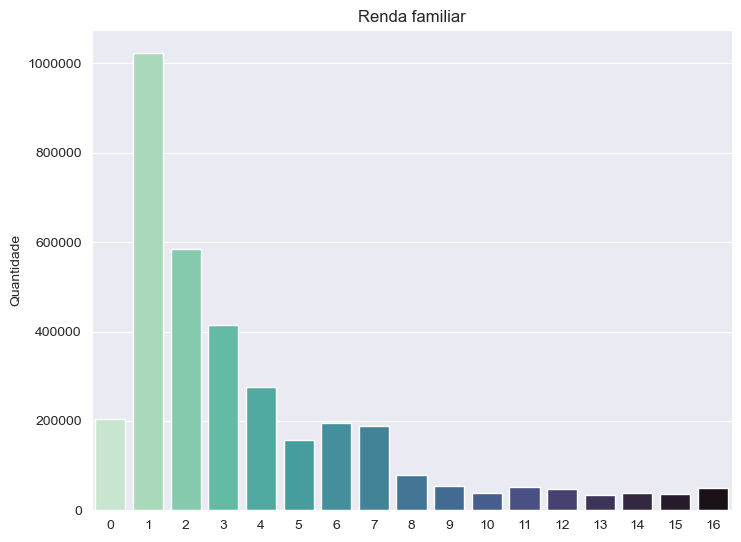

In [69]:
# Criando objetos para visualização
figura = plt.figure()
axes = figura.add_axes([0,0,1,1])

# Plotando e tirando notação científica do eixo y
sns.countplot(data=df_renda, x = 'RENDA_FAMILIAR', palette = 'mako_r').set_title("Renda familiar")
axes.ticklabel_format(style='plain', axis='y')

# Definindo legendas
axes.set_ylabel("Quantidade")
axes.set_xlabel("")
plt.show()

A distribuição de renda entre as famílias dos participantes do ENEM 2022 reflete um substancial nível de desigualdade social. Mesmo que as famílias com nenhuma renda (faixa 0) sejam um grupo relativamente pequeno, a grande maioria dispõe de uma renda mensal que se encontra entre 998,01 e 1.996,00 reais. Dessa forma, tem-se que 64% de todas famílias ganham de nenhuma renda a R$ 1.996,00. 

Por outro lado, apenas 9% das famílias apresentam uma renda mensal equivalente ou maior que R$ 5.988,01.

## <a> Acesso à internet </a>

In [70]:
# Criando novo DataFrame para manipulação de dados
internet_notas = df_enem.loc[:, colunas_notas_obj + ['NU_NOTA_REDACAO', 'Q025']]

# Criando dicionário para substituir os valores da coluna 'Q025' (que se refere ao acesso a internet)
internet = {'B':'Tem acesso à internet', 'A': 'Não tem acesso à internet'}
internet_notas['ACESSO_INTERNET'] = internet_notas['Q025'].map(internet)

# Vendo a porcentagem de participantes que tem e não tem acesso à internet
internet_notas['ACESSO_INTERNET'].value_counts(normalize = True) * 100

Tem acesso à internet       91
Não tem acesso à internet    9
Name: ACESSO_INTERNET, dtype: float64

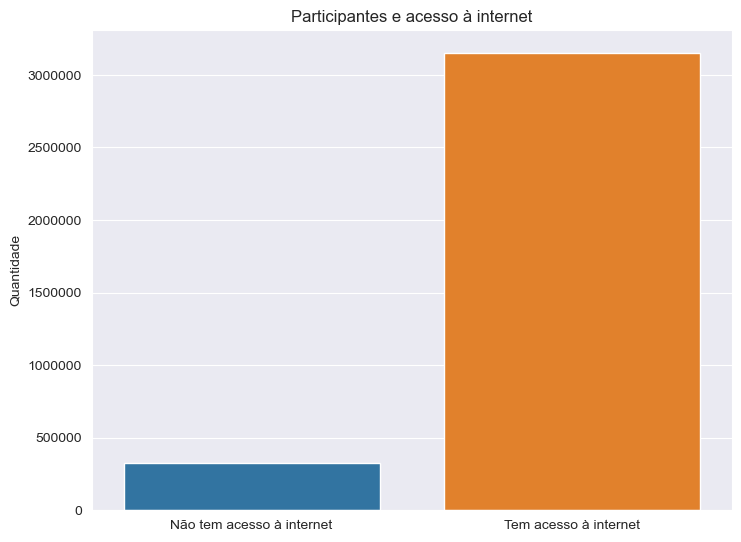

In [71]:
# Criando objetos para visualização 
figura = plt.figure()
axes = figura.add_axes([0,0,1,1])

# Setando estilo e paleta
sns.set_style("darkgrid")
sns.set_palette("tab10")

# Plotando e colocando legendas
sns.countplot(data = internet_notas, x = 'ACESSO_INTERNET').set_title("Participantes e acesso à internet")
axes.ticklabel_format(style='plain', axis='y')
axes.set_xlabel("")
axes.set_ylabel("Quantidade")
plt.show()

Aqui é perceptível que apesar da maior parte dos participantes dispor de acesso à internet em suas residências, há cerca de 9% dos candidatos que não usufruíram de tal proveito.

## <a> Status de conclusão do ensino médio </a>

In [72]:
# Criando novo DataFrame p/ manipulação de dados
df_conclusaoem = df_enem.copy()
conclusaoem = df_conclusaoem.loc[:, colunas_notas_obj + ['NU_NOTA_REDACAO', 'TP_ST_CONCLUSAO']]

# Criando valores substitutos para 'TP_ST_CONCLUSAO'
conclusao = {1:"Já concluí o Ensino Médio", 2: "Estou cursando e concluirei o Ensino Médio em 2022", 
            3: "Estou cursando e concluirei o Ensino Médio após 2022", 4: "Não concluí e não estou cursando o Ensino Médio"}

# Substituindo código de 'TP_ST_CONCLUSAO' por suas categorias
conclusaoem['CONCLUSAO_EM'] = conclusaoem['TP_ST_CONCLUSAO'].map(conclusao)

# Visualizando nova base
conclusaoem.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0         NaN         NaN         NaN         NaN              NaN   
1         NaN         NaN         NaN         NaN              NaN   
2         421         546         499         565              760   
3         491         389         358         416              320   
4         NaN         NaN         NaN         NaN              NaN   

   TP_ST_CONCLUSAO               CONCLUSAO_EM  
0                1  Já concluí o Ensino Médio  
1                1  Já concluí o Ensino Médio  
2                1  Já concluí o Ensino Médio  
3                1  Já concluí o Ensino Médio  
4                1  Já concluí o Ensino Médio

In [73]:
# Visualizando frequência dos grupos por status de conclusao do Ensino Médio
conclusaoem['CONCLUSAO_EM'].value_counts()

Já concluí o Ensino Médio                               1633253
Estou cursando e concluirei o Ensino Médio em 2022      1317560
Estou cursando e concluirei o Ensino Médio após 2022     512732
Não concluí e não estou cursando o Ensino Médio           12560
Name: CONCLUSAO_EM, dtype: int64

In [74]:
# Visualizando porcentagem dos grupos por status de conclusao do Ensino Médio
conclusaoem['CONCLUSAO_EM'].value_counts(normalize = True) * 100

Já concluí o Ensino Médio                              47
Estou cursando e concluirei o Ensino Médio em 2022     38
Estou cursando e concluirei o Ensino Médio após 2022   15
Não concluí e não estou cursando o Ensino Médio         0
Name: CONCLUSAO_EM, dtype: float64

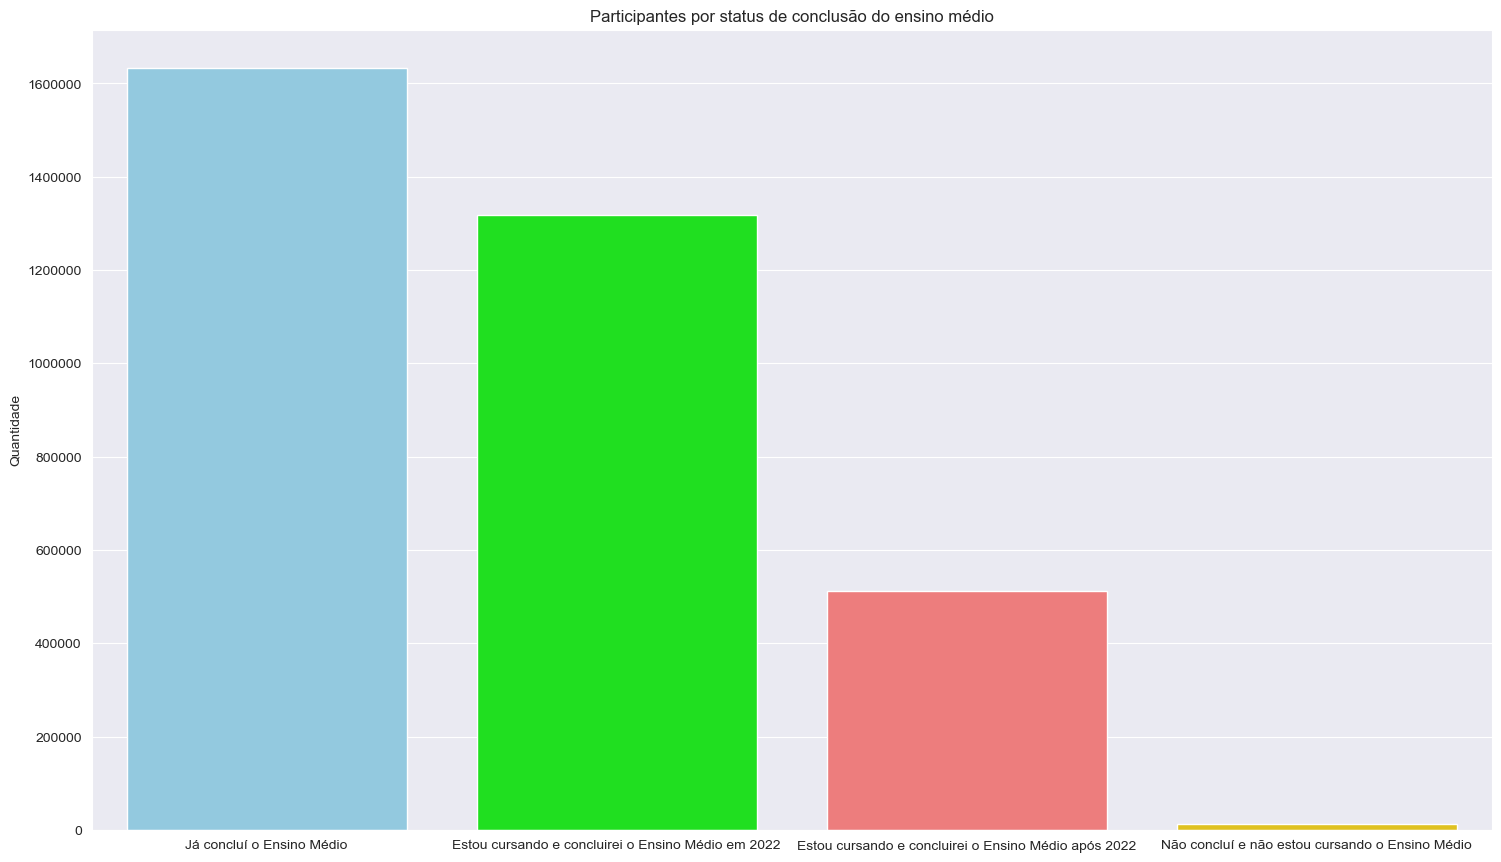

In [75]:
# Criando objetos para visualização 
figura = plt.figure(figsize=(14,8))
axes = figura.add_axes([0,0,1,1])

# Setando estilo, definindo cores e setando paleta
sns.set_style("darkgrid")
cores = ["#87CEEB", "#00FF00", "#FF6B6B", "#FFD700"]
sns.set_palette(cores)

# Plotando, tirando notação científica e colocando legendas
sns.countplot(data = conclusaoem, x = 'CONCLUSAO_EM').set_title("Participantes por status de conclusão do ensino médio")
axes.ticklabel_format(style='plain', axis='y')
axes.set_xlabel("")
axes.set_ylabel("Quantidade")
plt.show()

A partir deste gráfico, é possível perceber que a maior parte dos participantes no ENEM 2022 ou já havia concluído o ensino médio, ou iria concluir no ano de 2022. Nesse sentido, os dois contingentes, juntos, alcançaram um nível de 85% do total de candidatos. 

Além disso, é interessante perceber que os participantes que já concluíram o ensino médio são maioria em face das outras classes. Isso pode ser um indicativo de que muitos alunos saem das escolas ainda não direcionados para uma instituição de ensino superior. Isso pode revelar que que talvez haja potencial de mercado para atender os participantes que já saíram da escola, mas ainda tentam alcançar notas mais altas no ENEM.

## <a> Tipo de escola </a>

In [76]:
# Criando novo DataFrame p/ manipulação de dados
df_tipoesc = df_enem.copy()
df_tipoescola = df_tipoesc.loc[:, colunas_notas_obj + ['NU_NOTA_REDACAO', 'TP_ESCOLA']]

# Criando valores substitutos para 'TP_ST_CONCLUSAO'
tipoesc = {1:"Não Respondeu", 2: "Pública", 3: "Privada"}

# Substituindo código de 'TP_ESCOLA' por suas categorias
df_tipoescola['TIPO_ESCOLA'] = df_tipoescola['TP_ESCOLA'].map(tipoesc)

# Visualizando nova base
df_tipoescola.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  TP_ESCOLA  \
0         NaN         NaN         NaN         NaN              NaN          1   
1         NaN         NaN         NaN         NaN              NaN          1   
2         421         546         499         565              760          1   
3         491         389         358         416              320          1   
4         NaN         NaN         NaN         NaN              NaN          1   

     TIPO_ESCOLA  
0  Não Respondeu  
1  Não Respondeu  
2  Não Respondeu  
3  Não Respondeu  
4  Não Respondeu

In [77]:
# Visualizando frequência dos grupos por tipo de escola
df_tipoescola['TIPO_ESCOLA'].value_counts()

Não Respondeu    2158545
Pública          1105355
Privada           212205
Name: TIPO_ESCOLA, dtype: int64

In [78]:
# Visualizando porcentagem dos grupos por tipo de escola
df_tipoescola['TIPO_ESCOLA'].value_counts(normalize = True) * 100

Não Respondeu   62
Pública         32
Privada          6
Name: TIPO_ESCOLA, dtype: float64

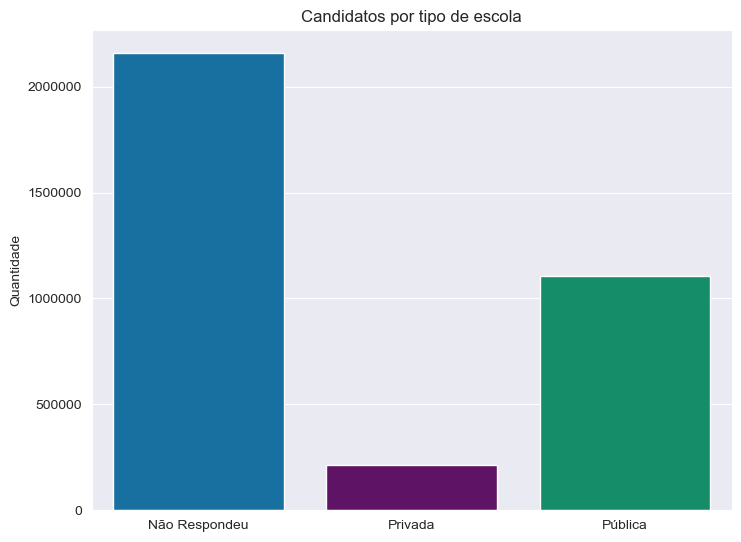

In [79]:
# Criando objetos para visualização 
figura = plt.figure()
axes = figura.add_axes([0,0,1,1])

# Setando estilo, definindo cores e setando paleta
sns.set_style("darkgrid")
cores = ["#0077B6", "#6A0572", "#00A170"]
sns.set_palette(cores)

# Plotando, tirando notação científica e colocando legendas
sns.countplot(data = df_tipoescola, x = 'TIPO_ESCOLA').set_title("Candidatos por tipo de escola")
axes.ticklabel_format(style='plain', axis='y')
axes.set_xlabel("")
axes.set_ylabel("Quantidade")
plt.show()

É importante destacar que há elevado nível de falta de informação nessa variável, de tal forma que uma análise mais criteriosa acerca de sua relação com as notas do participantes poderia ser prejudicada em vista disso.

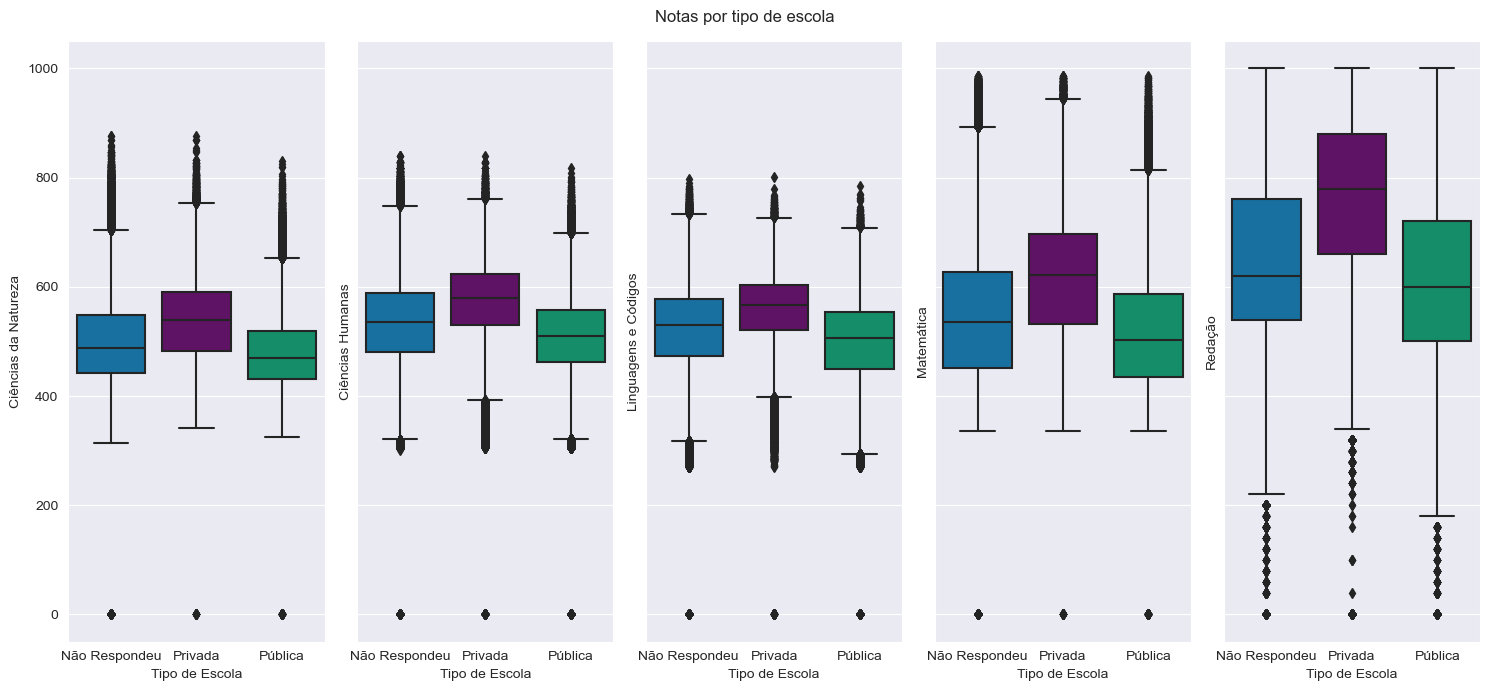

In [80]:
# Setando paleta de cores e estilo 
cores = ["#0077B6", "#6A0572", "#00A170"]
sns.set_palette(cores)
sns.set_style("darkgrid")

# Criando objetos para visualização e colocando título
figura, axes = plt.subplots(1,5, sharey = True, figsize=(15,7))
plt.suptitle("Notas por tipo de escola")

# Definindo colunas sobre as quais ocorrerão iterações
colunas = [coluna for coluna in df_tipoescola.columns if 'NOTA' in coluna]

# Plotando em cada subplot
for i in range(len(colunas)):
    sns.boxplot(data=df_tipoescola, y = colunas[i], x = 'TIPO_ESCOLA', ax =  axes[i])
    
# Colocando legenda em cada um dos axes 
names = {0:"Ciências da Natureza", 1:"Ciências Humanas", 2:"Linguagens e Códigos", 3:"Matemática", 4:"Redação"}
for i in range(len(names)):
    axes[i].set_ylabel(f"{names[i]}")
    axes[i].set_xlabel("Tipo de Escola")
plt.tight_layout()

Ainda que seja notória a diferença de desemepenho entre os participantes que estudaram em escolas particulares e os que estudaram em escolas públicas (sendo os dois casos durante o ensino médio), é importante ressaltar, mais uma vez, que o número de candidatos que não respondeu é muito elevado, o que pode dificultar a tentativa de traçar uma correlação entre essas características e as notas dos participantes.

## <a> Relacionando notas com características dos candidatos </a>

Após a exposição dos dados, sobretudo no que diz respeito as características dos participantes, é importante identificar como tais aspectos se relacionam com o desempenho dos candidatos.

## <a> Notas e sexo </a> 

In [81]:
# Criando dataframe para visualizar relações de nota e sexo
df_sexo = df_enem.loc[:, colunas_notas_obj + ['NU_NOTA_REDACAO', 'TP_SEXO']]
df_sexo.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO TP_SEXO
0         NaN         NaN         NaN         NaN              NaN       M
1         NaN         NaN         NaN         NaN              NaN       M
2         421         546         499         565              760       F
3         491         389         358         416              320       M
4         NaN         NaN         NaN         NaN              NaN       M

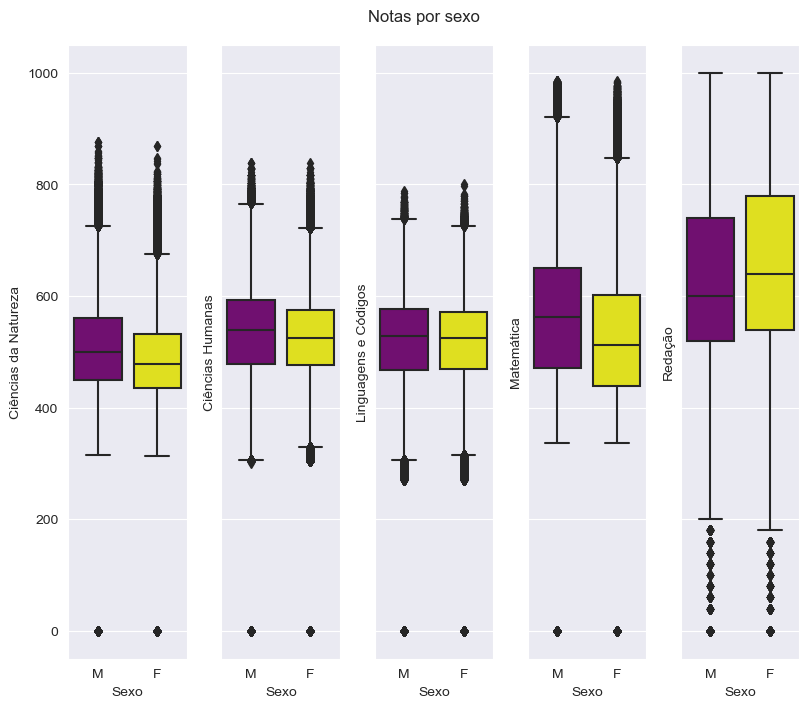

In [82]:
# Setando paleta de cores e estilo 
minhas_cores = ["#800080", "#FFFF00"]
sns.set_palette(minhas_cores)
sns.set_style("darkgrid")

# Criando objetos para visualização e colocando título
figura, axes = plt.subplots(1,5, sharey = True, figsize=(8,7))
plt.suptitle("Notas por sexo")
plt.tight_layout()

# Definindo colunas sobre as quais ocorrerão iterações
colunas = [coluna for coluna in df_sexo.columns if 'NOTA' in coluna]

# Plotando nos subplots
for i in range(len(colunas)):
    sns.boxplot(data=df_sexo, y = colunas[i], x = 'TP_SEXO', ax =  axes[i])
    
# Colocando legenda em cada um dos axes 
names = {0:"Ciências da Natureza", 1:"Ciências Humanas", 2:"Linguagens e Códigos", 3:"Matemática", 4:"Redação"}
for i in range(len(names)):
    axes[i].set_ylabel(f"{names[i]}")
    axes[i].set_xlabel("Sexo")

A partir da análise do gráfico acima, observa-se que as medianas estão, quase sempre, no mesmo patamar. Isso nos mostra que as notas das 5 provas não são substancialmente influenciadas pelo sexo do participante. No entanto, é válido atentar-se para a diferença da mediana das notas de matemática feitas por homens e mulheres, em que se observa um desempenho masculino razoavelmente mais alto. Por outro lado, quando a análise é extendida para as notas de redação, é possível identificar o contrário, isto é, a mediana das notas das mulheres é mais alta que a dos homens, o que demonstra um desempenho feminino superior neste caso. 
Apesar disso, não é possível detectar uma influência notória do sexo sobre as notas dos participantes nas 5 áreas.

## <a> Notas e raça </a>

In [83]:
# Criando dataframe (a partir de um já existente) para visualizar relações de nota e raça
df_notaraca = df_raca.loc[:, colunas_notas_obj + ['NU_NOTA_REDACAO', 'COR_RACA']]
df_notaraca.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO COR_RACA
0         NaN         NaN         NaN         NaN              NaN    Preta
1         NaN         NaN         NaN         NaN              NaN   Branca
2         421         546         499         565              760    Preta
3         491         389         358         416              320    Parda
4         NaN         NaN         NaN         NaN              NaN    Parda

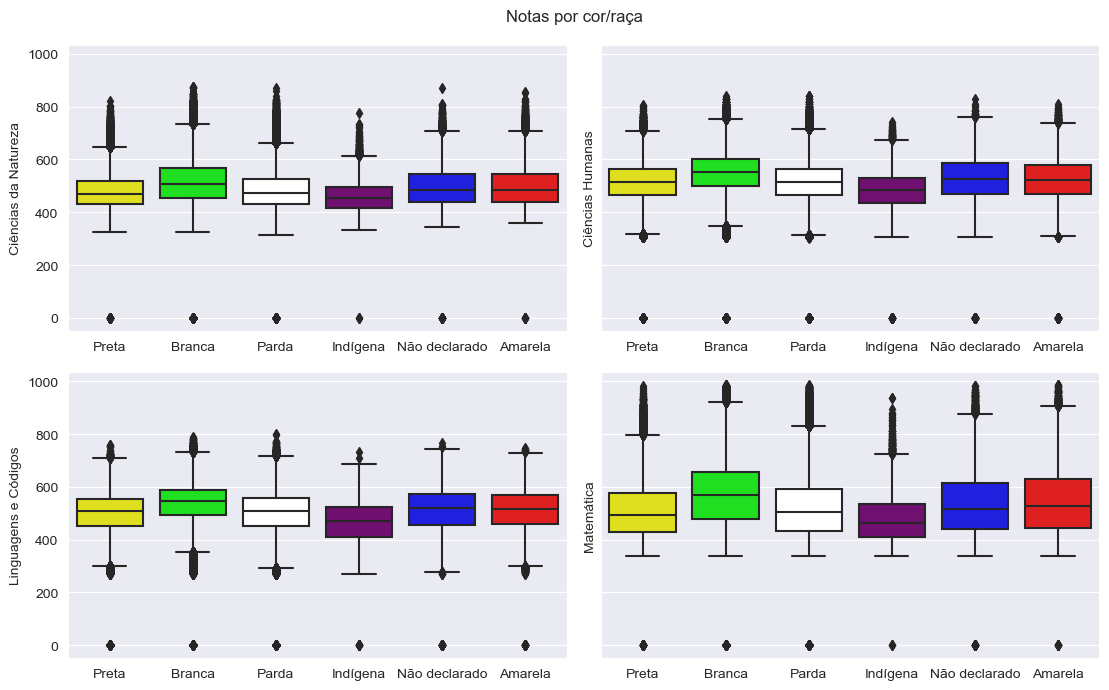

In [84]:
# Criando objetos para visualização
figura, axes = plt.subplots(2,2, sharey = True, figsize = (11,7))

# Setando paleta de cores e colocando título no gráfico
cores = ['#FFFF00', '#00FF00', '#FFFFFF', '#800080', '#0000FF', '#FF0000']
sns.set_palette(cores)
plt.suptitle("Notas por cor/raça")
plt.tight_layout()

# Plotando nos 4 axes 
for i in range(2):
    sns.boxplot(data = df_notaraca, y = colunas[i*2], x = 'COR_RACA', ax = axes[i][0])
    sns.boxplot(data = df_notaraca, y = colunas[i*2+1], x = 'COR_RACA', ax = axes[i][1])

# Colocando legendas no gráfico
names = {0:"Ciências da Natureza", 1:"Ciências Humanas", 2:"Linguagens e Códigos", 3:"Matemática"}
for i in range(2):
    axes[i][0].set_ylabel(f"{names[i*2]}")
    axes[i][1].set_ylabel(f"{names[i*2+1]}")
    axes[i][0].set_xlabel("")
    axes[i][1].set_xlabel("")

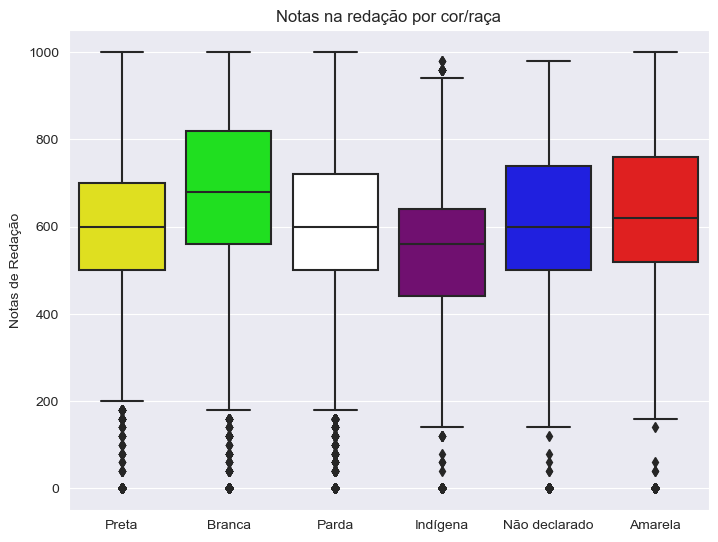

In [85]:
# Criando objetos para visualização e setando paleta de cores
figura = plt.figure()
axes = figura.add_axes([0,0,1,1])
sns.set_palette(cores)

# Plotando 
sns.boxplot(data=df_notaraca, y = 'NU_NOTA_REDACAO', x = 'COR_RACA', ax = axes).set_title("Notas na redação por cor/raça")

# Definindo legendas
axes.set_ylabel("Notas de Redação")
axes.set_xlabel("")
plt.show()

Conforme foi demonstrado graficamente, pode-se identificar que a nota (nas 5 áreas) dos participantes da cor/raça branca possui mediana mais elevada que a nota dos participantes de outras cores/raças. Uma possibilidade de explicação é que isso pode ser o reflexo da desigualdade em termos de nível de escolaridade no Brasil.

Ainda nesse sentido, percebe-se que a cor/raça indígena apresenta a menor mediana dentre todas as outras cores/raças (em todas as áreas), o que pode ocorrer, talvez, devido a um menor acesso à educação por parte deste grupo.

## <a> Notas e nível de escolaridade dos pais e mães </a>

In [86]:
# Criando DataFrame com notas e nível de instrução do pai e mãe 
ensinosup_notas = df_sup.loc[:, colunas_notas_obj + ['NU_NOTA_REDACAO','PAI_ENS_SUPERIOR','MAE_ENS_SUPERIOR']]

# Visualizando 
ensinosup_notas.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0         NaN         NaN         NaN         NaN              NaN   
1         NaN         NaN         NaN         NaN              NaN   
2         421         546         499         565              760   
3         491         389         358         416              320   
4         NaN         NaN         NaN         NaN              NaN   

   PAI_ENS_SUPERIOR  MAE_ENS_SUPERIOR  
0             False             False  
1             False             False  
2             False              True  
3             False             False  
4             False             False

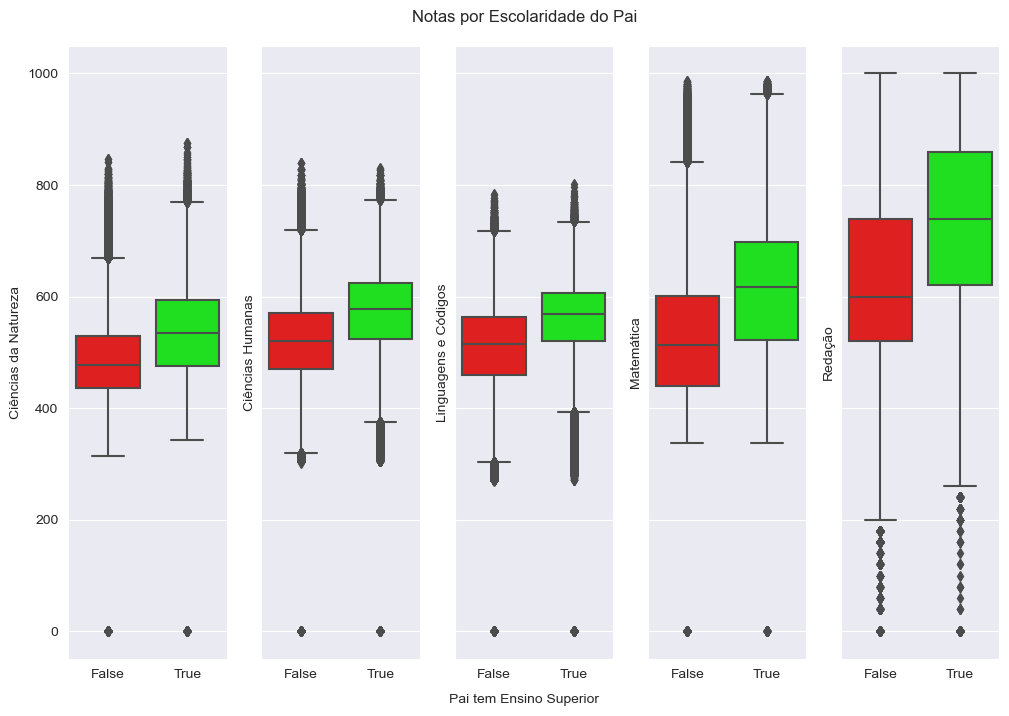

In [87]:
# Setando estilo e paleta de cores 
sns.set_style("darkgrid")
cores = ['#FF0000', '#00FF00']
sns.set_palette(cores)

# Criando objetos para visualização e colocando título no gráfico
figura, axes = plt.subplots(1,5, sharey = True, figsize=(10,7))
plt.suptitle("Notas por Escolaridade do Pai")
plt.tight_layout()

# Definindo colunas sobre as quais ocorrerão iterações
colunas = [coluna for coluna in ensinosup_notas.columns if 'NOTA' in coluna]

# Plotando 
for i in range(len(colunas)):
    sns.boxplot(data = ensinosup_notas, y = colunas[i], x = 'PAI_ENS_SUPERIOR', ax = axes[i]).set_xlabel("")

# Definindo legendas
names = {0:"Ciências da Natureza", 1:"Ciências Humanas", 2:"Linguagens e Códigos", 3:"Matemática", 4:"Redação"}
for i in names:
    axes[i].set_ylabel(f"{names[i]}")
figura.text(0.5, -0.01, 'Pai tem Ensino Superior', ha='center')
plt.show()

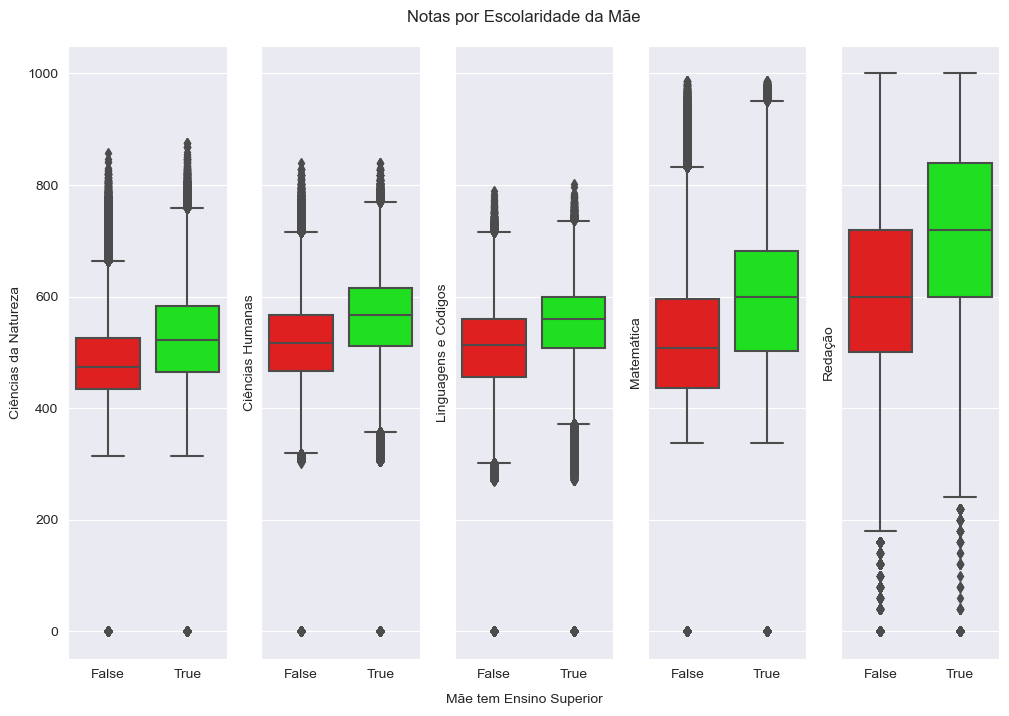

In [88]:
# Setando estilo e cores
sns.set_style("darkgrid")
cores = ['#FF0000', '#00FF00']
sns.set_palette(cores)

# Criando objetos para visualização e  colocando título no gráfico 
figura, axes = plt.subplots(1,5, sharey = True, figsize=(10,7))
plt.suptitle("Notas por Escolaridade da Mãe")
plt.tight_layout()

# Definindo colunas sobre as quais ocorrerão iterações
colunas = [coluna for coluna in ensinosup_notas.columns if 'NOTA' in coluna]

# Plotando 
for i in range(len(colunas)):
    sns.boxplot(data = ensinosup_notas, y = colunas[i], x = 'MAE_ENS_SUPERIOR', ax = axes[i]).set_xlabel("")

# Definindo legendas
names = {0:"Ciências da Natureza", 1:"Ciências Humanas", 2:"Linguagens e Códigos", 3:"Matemática", 4:"Redação"}
for i in names:
    axes[i].set_ylabel(f"{names[i]}")
figura.text(0.5, -0.01, 'Mãe tem Ensino Superior', ha='center')
plt.show()

Como fora demonstrado nos dois gráficos, é explícita a diferença no nível de desempenho do participante quando seu pai ou mãe possui ensino superior. 

No entanto, tambem é interessante comparar como o desemepenho varia quando se leva em conta 3 tipos de grupos: 
1) Participantes que nem o pai e nem a mãe possuem ensino superior
2) Participantes que pelo menos um dos pais possui ensino superior
3) Participantes que pai e mãe possuem ensino superior

In [89]:
# Criando nova variável 'PAIS_ENS_SUPERIOR' no DataFrame:
'''
PAIS_ENS_SUPERIOR:
0 -> Nenhum dos pais possui ensino superior
1 -> Pelo menos um dos pais possui ensino superior
2 -> Os dois possuem ensino superior
'''
# Criando novas colunas como conversão das colunas antigas
ensinosup_notas['INT_PAI_ENS_SUPERIOR'] = ensinosup_notas['PAI_ENS_SUPERIOR'].astype(int)
ensinosup_notas['INT_MAE_ENS_SUPERIOR'] = ensinosup_notas['MAE_ENS_SUPERIOR'].astype(int)

# Criando nova variável 'PAIS_ENS_SUPERIOR'
ensinosup_notas['PAIS_TEM_ENS_SUPERIOR'] = ensinosup_notas['INT_PAI_ENS_SUPERIOR'] + ensinosup_notas['INT_MAE_ENS_SUPERIOR']

In [90]:
# Visualizando a porcentagem de pais por nível de escolaridade
'''
0: Nenhum dos pais possui ensino superior
1: Pelo menos um dos pais possui ensino superior
2: Os dois pais possuem ensino superior
'''
ensinosup_notas['PAIS_TEM_ENS_SUPERIOR'].value_counts(normalize = True) * 100

0   71
1   18
2   11
Name: PAIS_TEM_ENS_SUPERIOR, dtype: float64

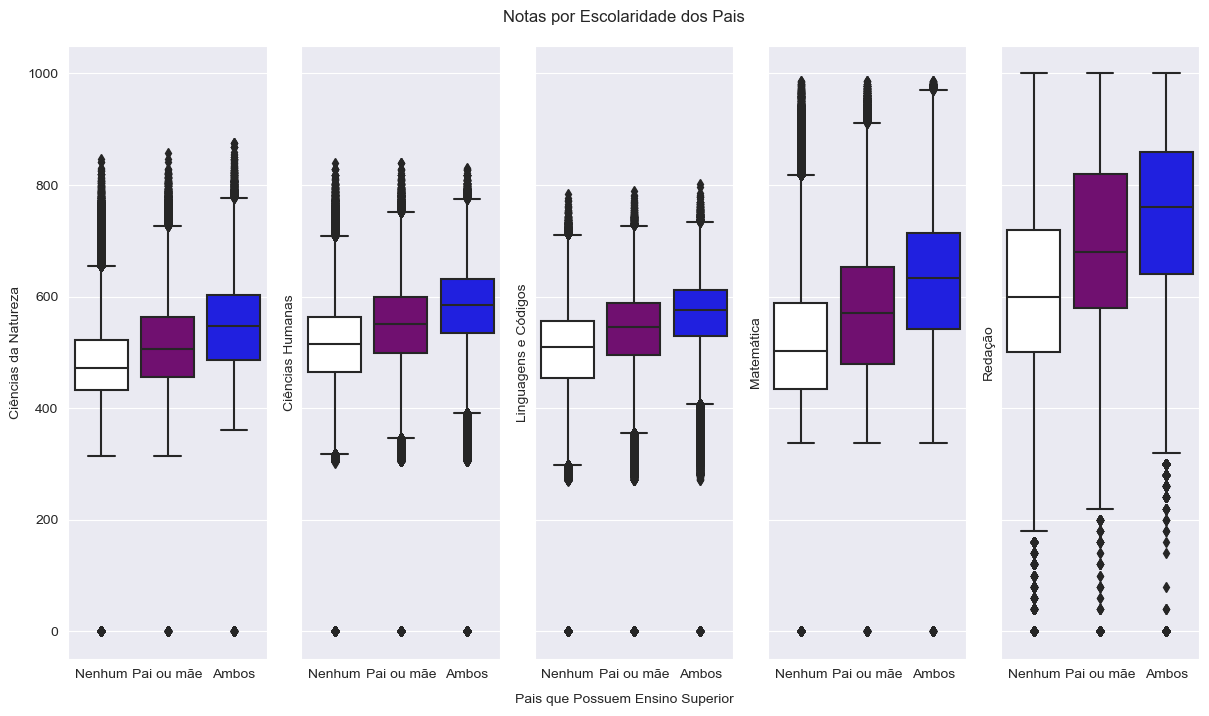

In [91]:
# Setando estilo
sns.set_style("darkgrid")

# Setando paleta de cores 
cores = ['#FFFFFF', '#800080', '#0000FF']
sns.set_palette(cores)

# Criando objetos para visualização 
figura, axes = plt.subplots(1,5, sharey = True, figsize=(12,7))
plt.suptitle("Notas por Escolaridade dos Pais")
plt.tight_layout()

# Definindo colunas sobre as quais ocorrerão iterações
colunas = [coluna for coluna in ensinosup_notas.columns if 'NOTA' in coluna]

# Plotando 
for i in range(len(colunas)):
    sns.boxplot(data = ensinosup_notas, y = colunas[i], x = 'PAIS_TEM_ENS_SUPERIOR', ax = axes[i]).set_xlabel("")

# Definindo legendas
names = {0:"Ciências da Natureza", 1:"Ciências Humanas", 2:"Linguagens e Códigos", 3:"Matemática", 4:"Redação"}
for i in names:
    axes[i].set_ylabel(f"{names[i]}")

# Definindo novo rotulo para o eixo x de cada subplot
novo_rotulo_x = ["Nenhum", "Pai ou mãe", "Ambos"]
for ax in axes:
    ax.set_xticklabels(novo_rotulo_x)

# Colocando legendas finais 
figura.text(0.5, -0.01, 'Pais que Possuem Ensino Superior', ha='center')
plt.show()

É notório que quando os dois pais possuem ensino superior, a mediana das notas dos filhos (em cada uma das provas) é superior às demais.

## <a> Notas e acesso à internet </a>

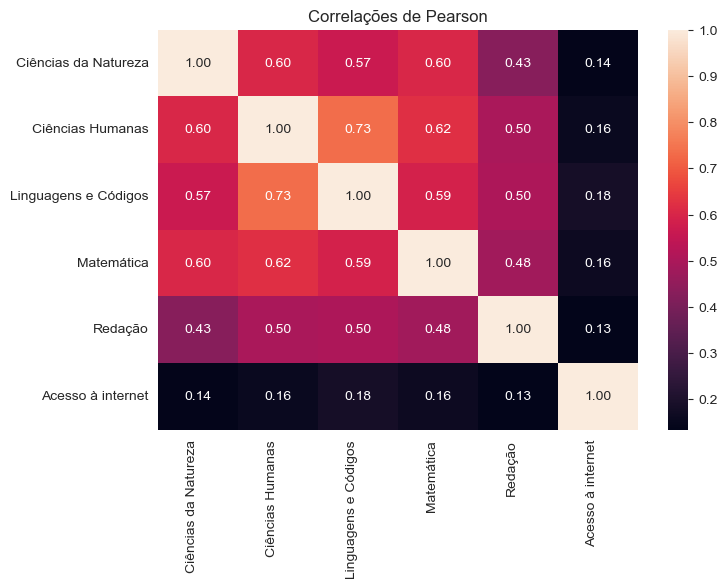

In [92]:
# Analisando correlação de pearson entre as notas e o acesso à internet

# Transformando acesso à internet em variável binária
acessobin = {"Tem acesso à internet": 1, "Não tem acesso à internet": 0}
internet_notas['ACESSO_INTERNET_BIN'] = internet_notas['ACESSO_INTERNET'].map(acessobin)

# Criando DataFrame só com notas e acesso a internet (transformado numa variável binária)
internet_notasbin = internet_notas.loc[:, colunas_notas_obj + ['NU_NOTA_REDACAO', 'ACESSO_INTERNET_BIN']]

# Criando objetos para visualização 
figura = plt.figure(figsize = (6,4))
axes = figura.add_axes([0,0,1,1])

# Plotando
correlacoes_internetnotas = internet_notasbin.corr()
sns.heatmap(correlacoes_internetnotas, ax= axes, annot = True, fmt=".2f").set_title("Correlações de Pearson")

# Definindo nomes mais mnemônicos
nomes_colunas = ["Ciências da Natureza", "Ciências Humanas", "Linguagens e Códigos", "Matemática", "Redação",
                 "Acesso à internet"]

# Trocando os rótulos dos eixos x e y
axes.set_xticklabels(nomes_colunas, rotation=90, ha='right')
axes.set_yticklabels(nomes_colunas, rotation=0)

# Mostrando o gráfico
plt.show()

De acordo com o coeficiente de correlação de Pearson, expresso no mapa de calor, para os microdados do ENEM 2022 o acesso à internet tem pouca influência sobre as notas dos participantes, apresentando sua relação mais intesa (0,18) com a nota de Linguagens e Códigos, o que se demonstra ser uma relação positiva fraca.

## <a> Notas e unidade federativa </a> 

In [93]:
# Criando cópia do DataFrame original para manipulação de dados
notas_uf = df_enem.copy()

# Selecionando as UFs com mais participantes (SP, MG, BA e RJ)
ufs_mais = notas_uf.loc[notas_uf['SG_UF_PROVA'].isin(['SP', 'MG', 'BA', 'RJ']), :]

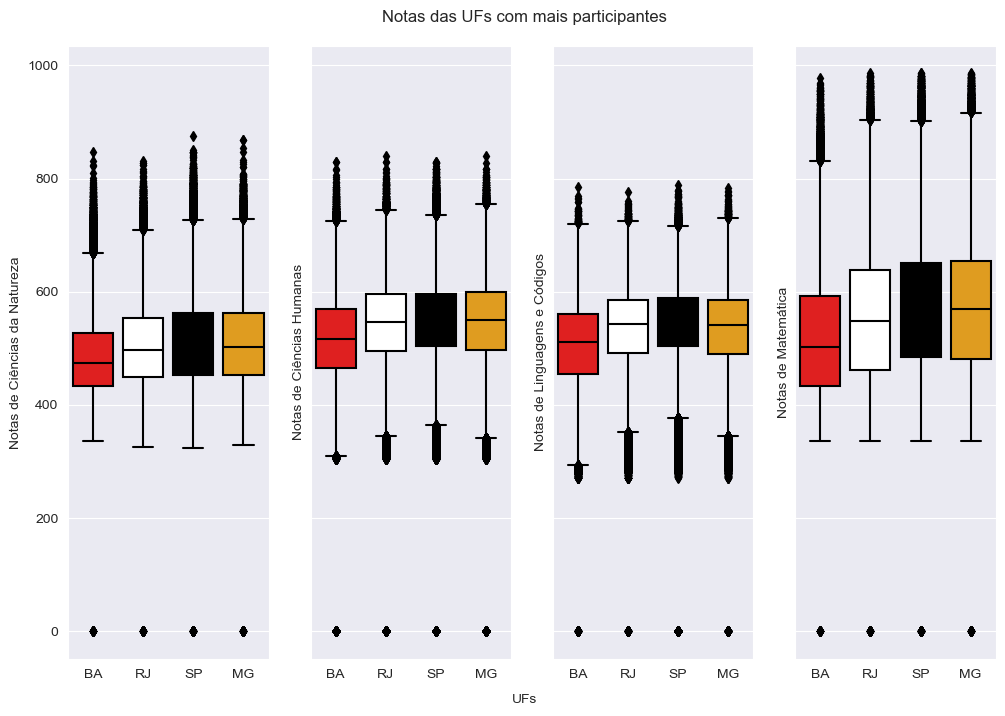

In [94]:
# Setando estilo e criando objetos para visualização
sns.set_style("darkgrid")
figura, axes = plt.subplots(1,4, sharey = True, figsize=(10,7))

# Setando titulo
plt.suptitle("Notas das UFs com mais participantes")
plt.tight_layout()

# Criando cores da paleta e setando 
cores = ["#FF0000", "#FFFFFF", "#000000", "#FFA500"]
sns.set_palette(cores)

# Definindo colunas e plotando 
notas = [coluna for coluna in ufs_mais.columns if 'NOTA' in coluna]
for i in range(4):
    sns.boxplot(data = ufs_mais, y = notas[i], x = 'SG_UF_PROVA', ax = axes[i]).set_xlabel("")
    
# Colocando legendas no gráfico
names = {0:"Ciências da Natureza", 1:"Ciências Humanas", 2:"Linguagens e Códigos", 3:"Matemática"}
for i in range(4):
    axes[i].set_ylabel(f"Notas de {names[i]}")
figura.text(0.5, -0.01, 'UFs', ha='center')
plt.show()

Dos estados que tiveram mais participantes (São Paulo, Minas Gerais, Bahia e Rio de Janeiro), observa-se que a Bahia obteve piores resultados nas notas das provas objetivas. 

## <a> Notas e idade </a>

In [95]:
# Analisando correlação de idades com notas
df_idadesnotas = df_idades.loc[:, colunas_notas_obj + ['NU_NOTA_REDACAO', 'IDADES']]
df_idadesnotas.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  IDADES
0         NaN         NaN         NaN         NaN              NaN      43
1         NaN         NaN         NaN         NaN              NaN      43
2         421         546         499         565              760      20
3         491         389         358         416              320      21
4         NaN         NaN         NaN         NaN              NaN      19

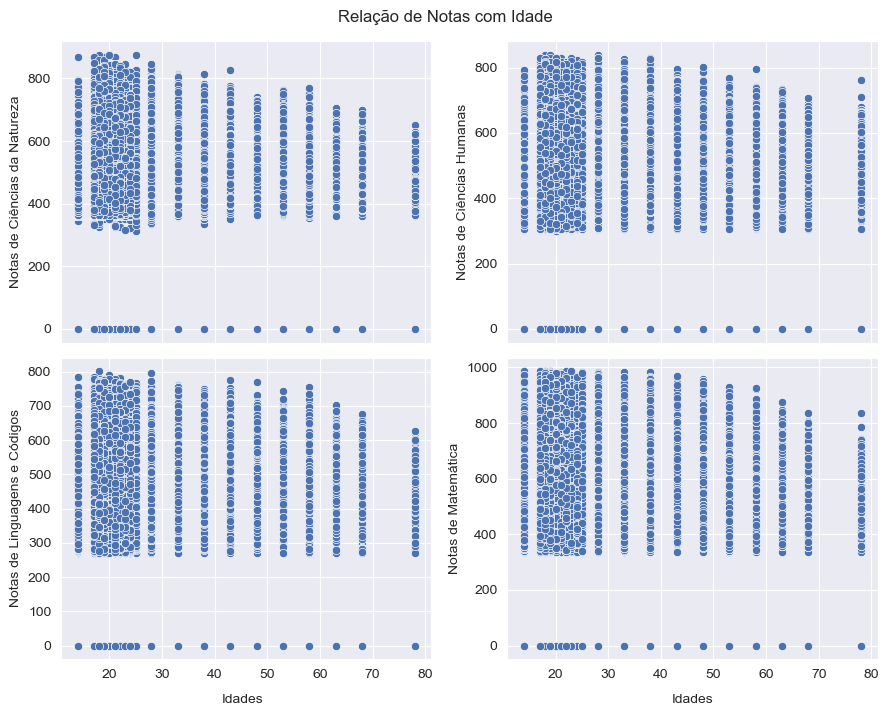

In [96]:
# Separando as colunas com notas
colunas = [coluna for coluna in df_idadesnotas.columns if 'NOTA' in coluna]

# Setando paleta de cores, estilo e criando objetos para visualização 
sns.set_style("darkgrid")
sns.set_palette("deep")
figura, axes = plt.subplots(2,2, sharex = True, figsize=(9,7))

# Plotando nos 4 axes 
for i in range(2):
    sns.scatterplot(data =df_idadesnotas, y = colunas[i*2], x = 'IDADES', ax = axes[i][0])
    sns.scatterplot(data = df_idadesnotas, y = colunas[i*2+1], x = 'IDADES', ax = axes[i][1])

# Colocando legendas no gráfico
names = {0:"Ciências da Natureza", 1:"Ciências Humanas", 2:"Linguagens e Códigos", 3:"Matemática"}
for i in range(2):
    axes[i][0].set_ylabel(f"Notas de {names[i*2]}")
    axes[i][1].set_ylabel(f"Notas de {names[i*2+1]}")
    axes[i][0].set_xlabel("")
    axes[i][1].set_xlabel("")      

# Colocando legendas finais 
figura.text(0.275, -0.01, 'Idades', ha='center')
figura.text(0.775, -0.01, 'Idades', ha='center')       
plt.suptitle("Relação de Notas com Idade")

# Visualizando o gráfico
plt.tight_layout()
plt.show()

Aparentemente (num primeiro momento) há determinada queda nas notas, em geral, quando a idade aumenta. No entanto, é importante utilizar um mapa de calor para verificar a veracidade dessa relação, já que os diversos pontos no gráfico de dispersão dificultam uma conclusão precisa do tipo de relação que essas variáveis possuem.

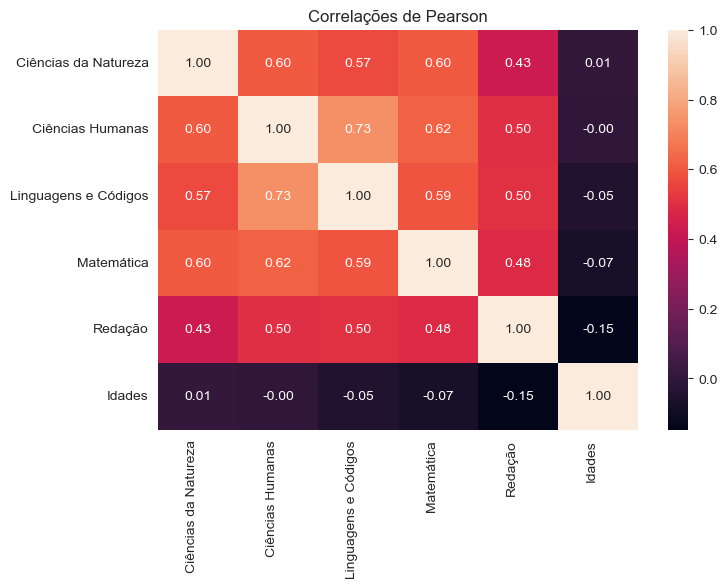

In [97]:
# Analisando correlação de pearson entre as notas e a idade

# Criando objetos para visualização 
figura = plt.figure(figsize = (6,4))
axes = figura.add_axes([0,0,1,1])

# Plotando
correlacoes_idade = df_idadesnotas.corr()
sns.heatmap(correlacoes_idade, ax= axes, annot = True, fmt=".2f").set_title("Correlações de Pearson")

# Definindo nomes mais mnemônicos
nomes_colunas = ["Ciências da Natureza", "Ciências Humanas", "Linguagens e Códigos", "Matemática", "Redação", "Idades"]

# Trocando os rótulos dos eixos x e y
axes.set_xticklabels(nomes_colunas, rotation=90, ha='right')
axes.set_yticklabels(nomes_colunas, rotation=0)

# Mostrando o gráfico
plt.show()

Com o auxílio do heatmap, observa-se que, na verdade, há uma correlação muito fraca entre as idades e as notas em geral.

## <a> Notas e renda </a>

In [98]:
# Criando novo dataframe com notas e renda familiar
notas_renda = df_renda.loc[:, colunas_notas_obj + ['NU_NOTA_REDACAO', 'RENDA_FAMILIAR']]
notas_renda.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0         NaN         NaN         NaN         NaN              NaN   
1         NaN         NaN         NaN         NaN              NaN   
2         421         546         499         565              760   
3         491         389         358         416              320   
4         NaN         NaN         NaN         NaN              NaN   

   RENDA_FAMILIAR  
0               1  
1              16  
2               1  
3               0  
4               1

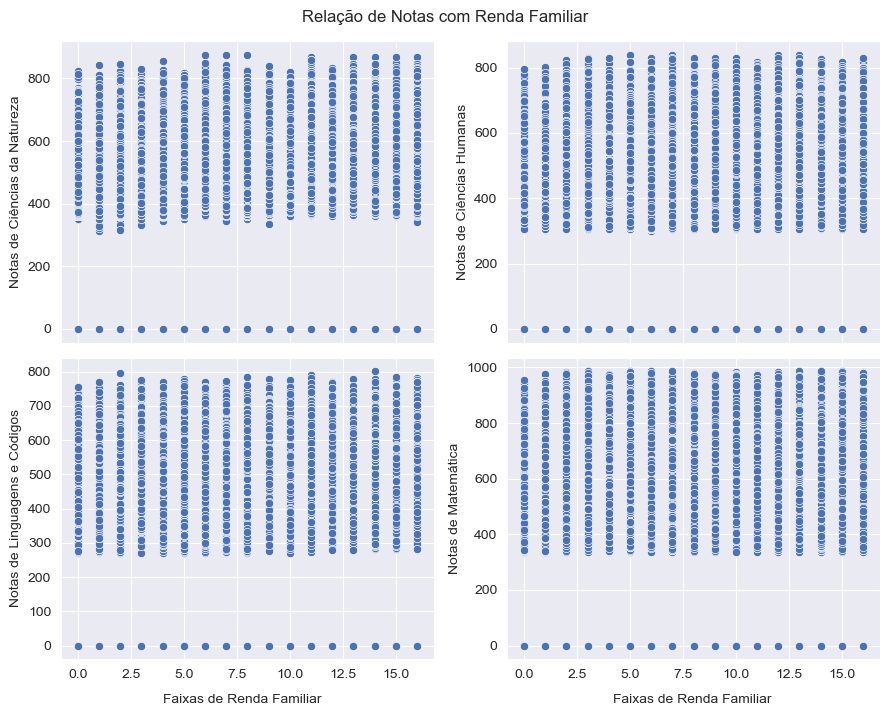

In [99]:
# Separando as colunas com notas
colunas = [coluna for coluna in notas_renda.columns if 'NOTA' in coluna]

# Setando paleta de cores, estilo e criando objetos para visualização 
sns.set_style("darkgrid")
sns.set_palette("deep")
figura, axes = plt.subplots(2,2, sharex = True, figsize=(9,7))

# Plotando nos 4 axes 
for i in range(2):
    sns.scatterplot(data =notas_renda, y = colunas[i*2], x = 'RENDA_FAMILIAR', ax = axes[i][0])
    sns.scatterplot(data = notas_renda, y = colunas[i*2+1], x = 'RENDA_FAMILIAR', ax = axes[i][1])

# Colocando legendas no gráfico
names = {0:"Ciências da Natureza", 1:"Ciências Humanas", 2:"Linguagens e Códigos", 3:"Matemática"}
for i in range(2):
    axes[i][0].set_ylabel(f"Notas de {names[i*2]}")
    axes[i][1].set_ylabel(f"Notas de {names[i*2+1]}")
    axes[i][0].set_xlabel("")
    axes[i][1].set_xlabel("")      

# Colocando legendas finais 
figura.text(0.275, -0.01, 'Faixas de Renda Familiar', ha='center')
figura.text(0.775, -0.01, 'Faixas de Renda Familiar', ha='center')       
plt.suptitle("Relação de Notas com Renda Familiar")

# Visualizando o gráfico
plt.tight_layout()
plt.show()

Os gráficos de dispersão não mostraram relações perceptíveis, sendo necessário, portanto, conferir o mapa de calor que informa a Correlação de Pearson entre as variáveis.

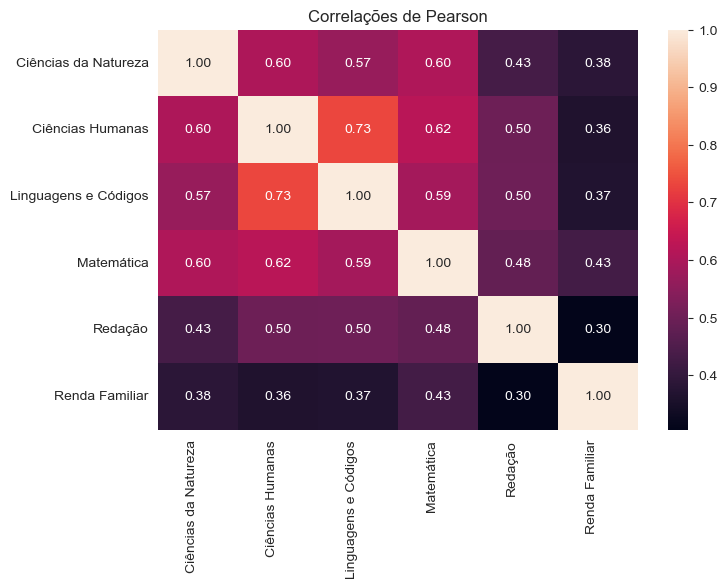

In [100]:
# Criando objetos para visualização 
figura = plt.figure(figsize = (6,4))
axes = figura.add_axes([0,0,1,1])

# Plotando
correlacoes_renda = notas_renda.corr()
sns.heatmap(correlacoes_renda, ax= axes, annot = True, fmt=".2f").set_title("Correlações de Pearson")

# Definindo nomes mais mnemônicos
nomes_colunas = ["Ciências da Natureza", "Ciências Humanas", "Linguagens e Códigos", "Matemática", "Redação", "Renda Familiar"]

# Trocando os rótulos dos eixos x e y
axes.set_xticklabels(nomes_colunas, rotation=90, ha='right')
axes.set_yticklabels(nomes_colunas, rotation=0)

# Mostrando o gráfico
plt.show()

Conforme o coeficiente de correlação de Pearson no mapa de calor aponta, as relações entre a renda familiar e as notas são positivas, porém fracas. Dentre as notas das 5 provas, a que mais sofreu influência (positiva) da renda familiar foi a nota de matemática, que apresentou um coeficiente de Pearson de 0,43.

## <a> Conclusões </a>

Em primeiro lugar, é importante ressaltar o que foi explicitado no início do trabalho: este projeto não pretende identificar relações de causalidade entre as variáveis expressas nos microdados do ENEM 2022. Toda a proposta do que foi exposto possui seus limites bem definidos no que se denomina análise de correlação.

Levando em consideração a análise exploratória construída ao longo deste projeto, cujos objetivos compreendiam a delimitação do perfil do participante "padrão" do ENEM 2022 e a identificação das principais características (variáveis) que influenciaram as notas, é possível destacar que houveram evidências de que há correlação entre as notas e:

- A raça: Os participantes do grupo indígena tiveram as piores notas dentre todas as outras etnias.

- O nível de escolaridade dos pais: Participantes que possuem pelo menos um dos pais com ensino superior obtiveram melhor desempenho se comparados aos participantes em que nenhum dos pais possuia tal grau de escolaridade. Extrapolando essa análise, também foi identificado que os participantes que possuem pai e mãe com ensino superior obtiveram desempenho ainda maior, sobretudo no que se refere as notas da prova de matemática.

- Além destas, foi possível constatar que a renda familiar tem uma correlação fraca com as notas de matématica. 

Além destas considerações, também foi interessante identificar que: 

- Dentre as unidades federativas que tiveram mais participantes (SP, MG, BA e RJ), a Bahia obteve o menor desempenho nas notas das provas objetivas.

- Com os microdados trabalhados neste projeto, não foi possível confirmar que sexo, idade e acesso à internet tem suficiente relação com as notas.

Ficou evidente que a grande maioria dos participantes (cerca de 64%) tem renda familiar inferior a R$ 1.997,00.

O candidato "padrão" do ENEM é mulher, com 18 anos, solteira, parda, com renda familiar inferior a R$ 1.497,00 com ambos pai e mãe sem ensino superior.